# Section B


# **Part (a)**

In [226]:
import numpy as np

In [227]:
def sigmoid_fun(z):
      logit = 1 + np.exp(-z)
      return 1/logit

def compute_hypothesis(X, wts, bias):
    return sigmoid_fun(np.dot(X, wts) + bias)

In [228]:
def batch_gradient_descent(X, Y, wts, bias, l_r):
    m = X.shape[0]

    Y_predictions = compute_hypothesis(X, wts, bias)

    w_grad = np.dot(X.T, (Y_predictions - Y)) / m #Gradient for weights

    b_grad = np.sum(Y_predictions - Y) / m #Gradient for bias

    wts -= l_r * w_grad
    bias -= l_r * b_grad
    return wts, bias

In [229]:
def compute_cost(Y, Y_predictions):
    Y_predictions = np.clip(Y_predictions, 1e-10, 1 - 1e-10)#for avoiding log(0) errors
    log_of_predictions = np.log(Y_predictions)
    one_minus_log_of_predictions = np.log(1 - Y_predictions)

    return -np.mean(Y * log_of_predictions + (1 - Y) * one_minus_log_of_predictions)

In [230]:
def train_logistic_regression(X_train, Y_train, X_val, Y_val, l_r = 0.01, iterations=1200):

    no_of_features = X_train.shape[1]
    #Initialization
    wts = np.zeros(no_of_features)
    bias = 0

    costs_train = []
    costs_val = []
    accuracies_train = []
    accuracies_val = []

    for i in range(iterations):
        # Training Loss
        Y_hypo_train = compute_hypothesis(X_train, wts, bias)
        training_cost = compute_cost(Y_train, Y_hypo_train)
        costs_train.append(training_cost)

        # Validation Loss
        Y_hypo_val = compute_hypothesis(X_val, wts, bias)
        validation_cost = compute_cost(Y_val, Y_hypo_val)
        costs_val.append(validation_cost)

        # Training Accuracy
        training_accuracy = np.mean((Y_hypo_train >= 0.5) == Y_train)
        accuracies_train.append(training_accuracy)

        #Validation Accuracy
        val_acc = np.mean((Y_hypo_val >= 0.5) == Y_val)
        accuracies_val.append(val_acc)

        # Update weights and bias using gradient descent
        wts, bias = batch_gradient_descent(X_train, Y_train, wts, bias, l_r)


    return wts, bias, costs_train, costs_val, accuracies_train, accuracies_val

Training the data on the training set and evaluating its performance on validation set

In [231]:
import pandas as pd

def load_and_preprocess(file_path):
    data = pd.read_csv(file_path)
    data_cleaned = data.dropna()
    X = data_cleaned.drop(columns='HeartDisease').values
    y = data_cleaned['HeartDisease'].values
    return X, Y



Preprocessing the data

In [232]:
from imblearn.over_sampling import RandomOverSampler

def resampling(X, Y):
  resamp = RandomOverSampler(random_state=44)
  X_resampled, Y_resampled = resamp.fit_resample(X, Y)
  print(X_resampled.shape)
  print(Y_resampled)
  return X_resampled, Y_resampled

Splliting the dataset

In [233]:
from sklearn.model_selection import train_test_split

def split_datasets_into_train_val_test(X, Y):
  X_train, X_main, Y_train, Y_main = train_test_split(X, Y, test_size=0.30, random_state=39)
  X_val, X_test, Y_val, Y_test = train_test_split(X_main, Y_main, test_size=0.50, random_state=51)
  return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [234]:
X,Y = load_and_preprocess('./Heart_Disease.csv')

X_resampled, Y_resampled = resampling(X, Y)

X_train, Y_train, X_val, Y_val, X_test, Y_test = split_datasets_into_train_val_test(X_resampled, Y_resampled)


(6198, 15)
[0 0 0 ... 1 1 1]


In [235]:
wts, bias, train_loss_hist, val_loss_hist, train_acc_hist, val_acc_hist = train_logistic_regression(X_train, Y_train, X_val, Y_val, l_r=0.01, iterations=1200)
print('Weights :  ',wts, ' and Bias: ', bias)
print('Training Cost : ', train_loss_hist)
print('Training Accuracies : ',train_acc_hist)
print('validation cost : ',val_loss_hist)
print('Validation Accuracies : ',val_acc_hist)

<ipython-input-227-d3f5f6008ea4>:2: RuntimeWarning: overflow encountered in exp
  logit = 1 + np.exp(-z)


Weights :   [ 0.23399977  5.2986299  -0.69902455 -0.03900851  2.07209221  0.09096788
  0.03794129  0.50002369  0.07389836 -1.54324174  4.6898945  -3.37394982
 -1.62396152 -7.02154124  0.83722214]  and Bias:  -0.1737755924620173
Training Cost :  [0.6931471805599453, 2.0031216537187393, 11.289991915215413, 11.73206985416733, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653782, 11.289991915215413, 11.735858972653

In [236]:
import matplotlib.pyplot as plt

def plot_train_and_val(train_data, val_data, label1, label2, color1, color2, xlabel, ylabel, title1, title2):
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(train_data, label=label1, color= color1)

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  plt.title(title1)
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(val_data, label=label2, color=color2)

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  plt.title(title2)

  plt.legend()

  plt.tight_layout()

  plt.show()

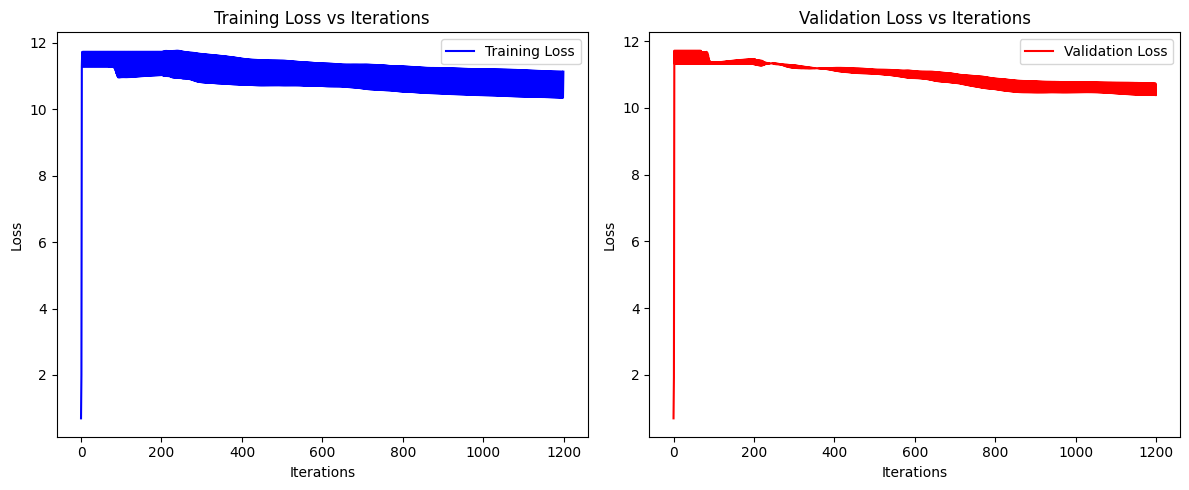

In [16]:
plot_train_and_val(
    train_loss_hist,
    val_loss_hist,
    'Training Loss',
    'Validation Loss',
    'blue',
    'red',
    'Iterations',
    'Loss',
    'Training Loss vs Iterations',
    'Validation Loss vs Iterations'
)

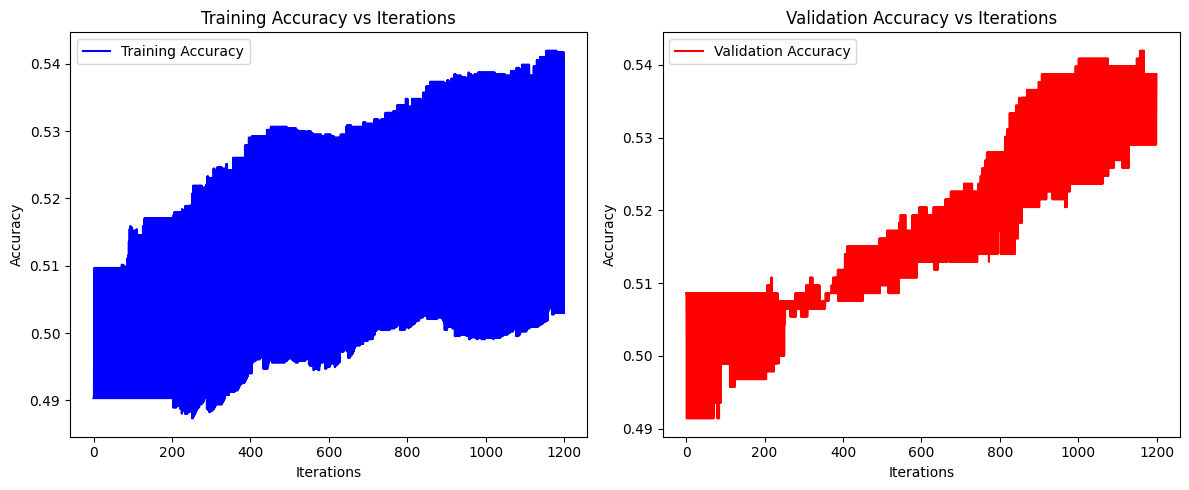

In [17]:
plot_train_and_val(
    train_acc_hist,
    val_acc_hist,
    'Training Accuracy',
    'Validation Accuracy',
    'blue',
    'red',
    'Iterations',
    'Accuracy',
    'Training Accuracy vs Iterations',
    'Validation Accuracy vs Iterations'
)

# **Part (b)**

In [237]:
def min_max_scaling(X):
    max_X = np.max(X, axis=0)  # Maximum value from each feature
    min_X = np.min(X, axis=0)  # Minimum value from each feature

    scaled_X = (X - min_X) / (max_X - min_X)  # Scaled version of X

    return scaled_X


In [238]:

X_scaled_resampled = min_max_scaling(X_resampled)
print(type(X_scaled_resampled))

X_train_scaled, Y_train_scaled, X_val_scaled, Y_val_scaled, X_test_scaled,Y_test_scaled = split_datasets_into_train_val_test(X_scaled_resampled, Y_resampled)


<class 'numpy.ndarray'>


In [239]:
wts_scaled, bias_scaled, train_loss_hist_scaled, val_loss_hist_scaled, train_acc_hist_scaled, val_acc_hist_scaled = train_logistic_regression(X_train_scaled, Y_train_scaled, X_val_scaled, Y_val_scaled, l_r=0.01, iterations=1200)

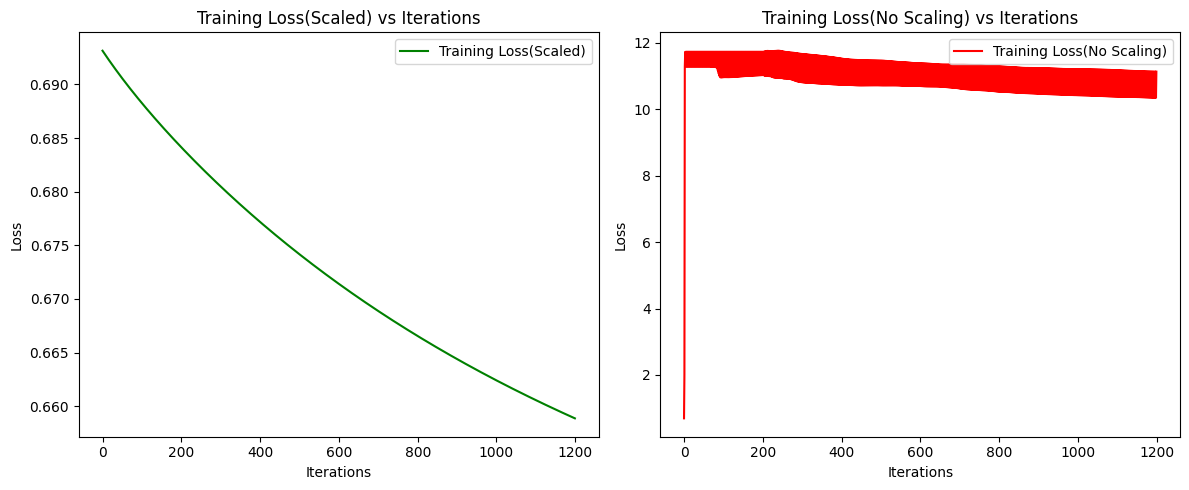

In [21]:
plot_train_and_val(
    train_loss_hist_scaled,
    train_loss_hist,
    'Training Loss(Scaled)',
    'Training Loss(No Scaling)',
    'green',
    'red',
    'Iterations',
    'Loss',
    'Training Loss(Scaled) vs Iterations',
    'Training Loss(No Scaling) vs Iterations'
)

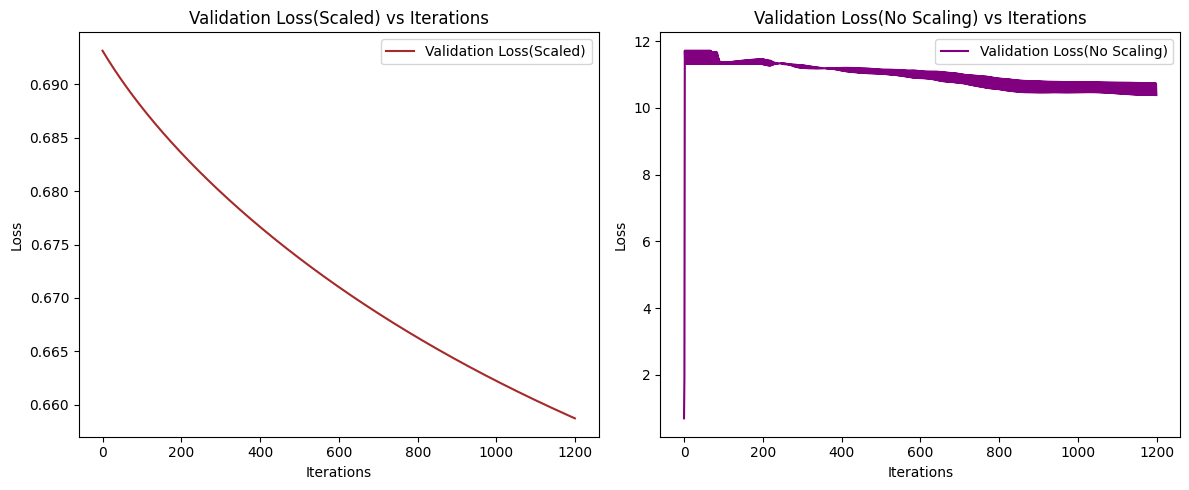

In [240]:
plot_train_and_val(
    val_loss_hist_scaled,
    val_loss_hist,
    'Validation Loss(Scaled)',
    'Validation Loss(No Scaling)',
    'brown',
    'purple',
    'Iterations',
    'Loss',
    'Validation Loss(Scaled) vs Iterations',
    'Validation Loss(No Scaling) vs Iterations'
)

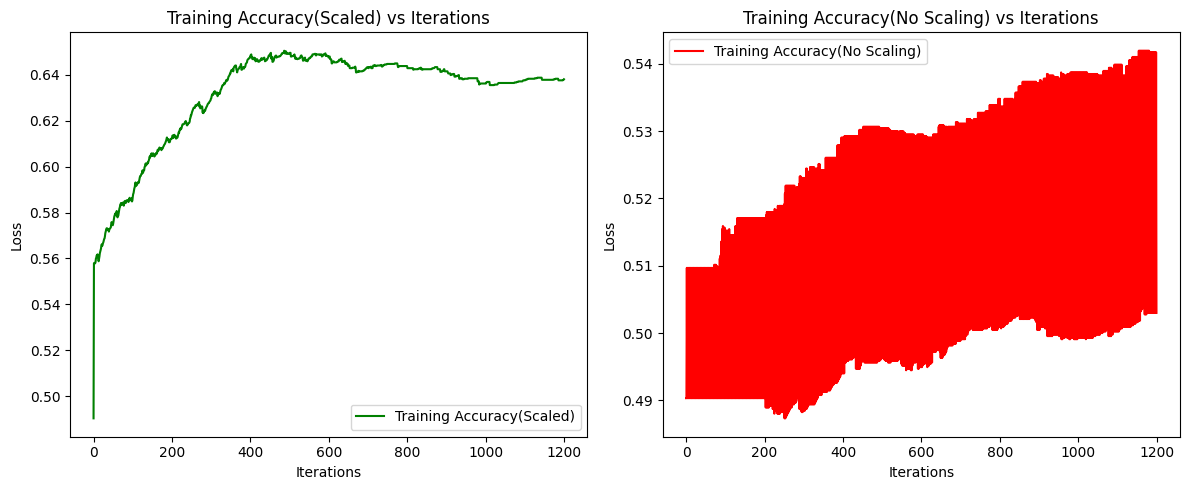

In [23]:
plot_train_and_val(
    train_acc_hist_scaled,
    train_acc_hist,
    'Training Accuracy(Scaled)',
    'Training Accuracy(No Scaling)',
    'green',
    'red',
    'Iterations',
    'Loss',
    'Training Accuracy(Scaled) vs Iterations',
    'Training Accuracy(No Scaling) vs Iterations'
)

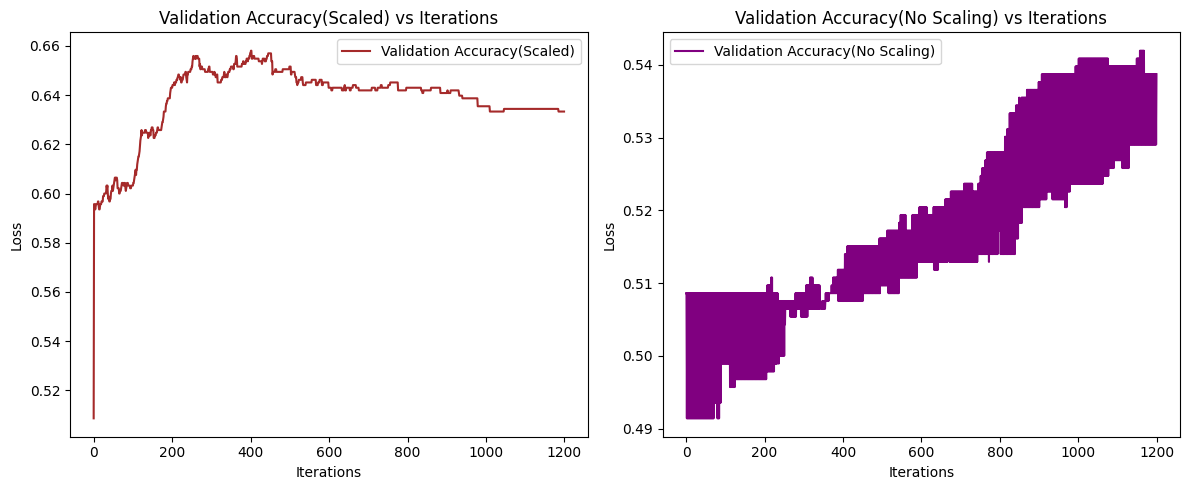

In [24]:
plot_train_and_val(
    val_acc_hist_scaled,
    val_acc_hist,
    'Validation Accuracy(Scaled)',
    'Validation Accuracy(No Scaling)',
    'brown',
    'purple',
    'Iterations',
    'Loss',
    'Validation Accuracy(Scaled) vs Iterations',
    'Validation Accuracy(No Scaling) vs Iterations'
)

# **Part (c)**

In [53]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def calculate_metrics(y_true, y_pred):
    precision_val = precision_score(y_true, y_pred, zero_division=0)#It will written the precision of the validation set
    confusion_mat_val = confusion_matrix(y_true, y_pred)#It will return confusion matrix of the Vaidation dataset
    #Recall value or Sensitivity of the Validation set
    recall_val = recall_score(y_true, y_pred, zero_division=0)
    #F1 SCore which represents the mean harmony between precision and recall
    f1score_val = f1_score(y_true, y_pred, zero_division=0)
    #ROC_AUC Score for the validation set
    roc_val = roc_auc_score(y_true, y_pred)
    return precision_val, confusion_mat_val, recall_val, f1score_val, roc_val

Metrics without scaling

In [242]:
ground_truth_values_ns = Y_val
hypothesis_values_ns = compute_hypothesis(X_val, wts, bias)
hypothesis_values_ns_class = (hypothesis_values_ns >= 0.5).astype(int)
precision_val_ns, confusion_mat_ns,recall_val_ns, f1score_val_ns, roc_val_ns = calculate_metrics(ground_truth_values_ns , hypothesis_values_ns_class)
print('Confusion Matrix(No-Scaling): ', confusion_mat_ns)
print('Recall/Sensitivy(No-Scaling): ', recall_val_ns)
print('Precision(No-Scaling): ',precision_val_ns)
print('F1-Score(No-Scaling): ', f1score_val_ns)
print('ROC Score(No-Scaling): ',  roc_val_ns )

Confusion Matrix(No-Scaling):  [[446  11]
 [427  46]]
Recall/Sensitivy(No-Scaling):  0.09725158562367865
Precision(No-Scaling):  0.8070175438596491
F1-Score(No-Scaling):  0.17358490566037738
ROC Score(No-Scaling):  0.5365907818709204


Metrics with Scaling

In [241]:
ground_truth_values_scaled = Y_val
hypothesis_values_scaled = compute_hypothesis(X_val_scaled, wts_scaled, bias_scaled)
hypothesis_values_scaled_class = (hypothesis_values_scaled >= 0.5).astype(int)
precision_val_scaled, confusion_mat_scaled,recall_val_scaled, f1score_val_scaled, roc_val_scaled = calculate_metrics(ground_truth_values_scaled , hypothesis_values_scaled_class)
print('Confusion Matrix(With Scaling): ', confusion_mat_scaled)
print('Recall/Sensitivy(With Scaling): ', recall_val_scaled)
print('Precision(With Scaling): ',precision_val_scaled)
print('F1-Score(With Scaling): ', f1score_val_scaled)
print('ROC Score(With Scaling): ',  roc_val_scaled)

Confusion Matrix(With Scaling):  [[298 159]
 [182 291]]
Recall/Sensitivy(With Scaling):  0.6152219873150105
Precision(With Scaling):  0.6466666666666666
F1-Score(With Scaling):  0.6305525460455037
ROC Score(With Scaling):  0.6336503809660392


# **Part (d)**

In [243]:
def stochastic_gradient_descent(X, Y, l_r, wts, bias):
    m = X.shape[0]  # Number of samples

    for itr in range(m):
        x_i = X[itr:].reshape(1, -1)  # Single data point
        y_i = Y[itr]

        y_hypothesis = compute_hypothesis(x_i, wts, bias)

        w_gradient = np.dot(x_i.T, (y_hypothesis - y_i))

        b_gradient = y_hypothesis - y_i

        wts -= l_r * w_gradient.flatten()
        bias -= l_r * b_gradient.squeeze()

    return wts, bias

In [244]:
def mini_batch_gradient_descent(X, Y, l_r, wts, bias, size_of_batch):
    m = X.shape[0]  # Number of sample data points
    ind = np.random.permutation(m)

    X_shuffled_version = X[ind]
    y_shuffled_version = Y[ind]

    for iter in range(0, m, size_of_batch):
        X_mini_batch = X_shuffled_version[iter : iter + size_of_batch]
        y_mini_batch = y_shuffled_version[iter : iter + size_of_batch]

        y_hypothesis = compute_hypothesis(X_mini_batch, wts, bias).squeeze()


        w_grad = np.dot(X_mini_batch.T, (y_hypothesis - y_mini_batch)) / size_of_batch
        b_grad = np.sum(y_hypothesis - y_mini_batch) / size_of_batch

        wts = wts - (l_r * w_grad)
        bias = bias - (l_r * b_grad)

    return wts, bias


In [245]:
def train_optimised_logistic_regression(X_train, Y_train, X_val, Y_val, X_test, Y_test, l_r=0.01, iterations=1000, opt_algo='m32'):
    n_features = X_train.shape[1]
    wts = np.zeros(n_features)
    bias = 0

    costs_train = []
    costs_val = []
    costs_test = []
    accuracies_train = []
    accuracies_val = []
    accuracies_test = []

    for iteration in range(iterations):
        if opt_algo == 'sgd':
            wts, bias = stochastic_gradient_descent(X_train, Y_train, l_r, wts, bias)
        elif opt_algo == 'm32':
            wts, bias = mini_batch_gradient_descent(X_train, Y_train,l_r, wts, bias, 32)
        else:
            wts, bias = mini_batch_gradient_descent(X_train, Y_train,l_r, wts, bias,  64)

        y_train_hypothesis = compute_hypothesis(X_train, wts, bias)
        y_val_hypothesis = compute_hypothesis(X_val, wts, bias)

        y_test_hypothesis = compute_hypothesis(X_test, wts, bias)

        train_loss = compute_cost(Y_train, y_train_hypothesis)
        val_loss = compute_cost(Y_val, y_val_hypothesis)

        test_loss = compute_cost(Y_test, y_test_hypothesis)

        costs_train.append(train_loss)
        costs_val.append(val_loss)
        costs_test.append(test_loss)

        train_accuracy = np.mean((y_train_hypothesis >= 0.5) == Y_train)

        val_accuracy = np.mean((y_val_hypothesis >= 0.5) == Y_val)

        test_accuracy = np.mean((y_test_hypothesis >= 0.5) == Y_test)


        accuracies_train.append(train_accuracy)
        accuracies_val.append(val_accuracy)
        accuracies_test.append(test_accuracy)

    return costs_train, costs_val, costs_test, accuracies_train, accuracies_val, accuracies_test

In [246]:
df = pd.read_csv('./Heart_Disease.csv')
data = df.dropna()
X = data.drop(columns='HeartDisease').to_numpy()
Y = data['HeartDisease'].values

X,Y = load_and_preprocess('./Heart_Disease.csv')

X_resampled_v2, Y_resampled_v2 = resampling(X, Y)

X_scaled_resampled_v2 = min_max_scaling(X_resampled_v2)

X_train_scaled, Y_train_scaled, X_val_scaled, Y_val_scaled, X_test_scaled,Y_test_scaled = split_datasets_into_train_val_test(X_scaled_resampled_v2, Y_resampled_v2)

(6198, 15)
[0 0 0 ... 1 1 1]


In [247]:


# Call the function for SGD


results_sgd = train_optimised_logistic_regression(X_train_scaled, Y_train, X_val, Y_val, X_test, Y_test, l_r=0.01, iterations=200, opt_algo='sgd')
costs_train_sgd, costs_val_sgd, costs_test_sgd, accuracies_train_sgd, accuracies_val_sgd, accuracies_test_sgd = results_sgd

# Call the function for Mini-Batch Gradient Descent with batch size 32
results_m32 = train_optimised_logistic_regression(X_train, Y_train, X_val, Y_val, X_test, Y_test, l_r=0.01, iterations=200, opt_algo='m32')
costs_train_m32, costs_val_m32, costs_test_m32, accuracies_train_m32, accuracies_val_m32, accuracies_test_m32 = results_m32

# Call the function for Mini-Batch Gradient Descent with batch size 64
results_m64 = train_optimised_logistic_regression(X_train, Y_train, X_val, Y_val, X_test, Y_test, l_r=0.01, iterations=200, opt_algo='m64')
costs_train_m64, costs_val_m64, costs_test_m64, accuracies_train_m64, accuracies_val_m64, accuracies_test_m64 = results_m64


ValueError: shapes (1,65070) and (15,) not aligned: 65070 (dim 1) != 15 (dim 0)

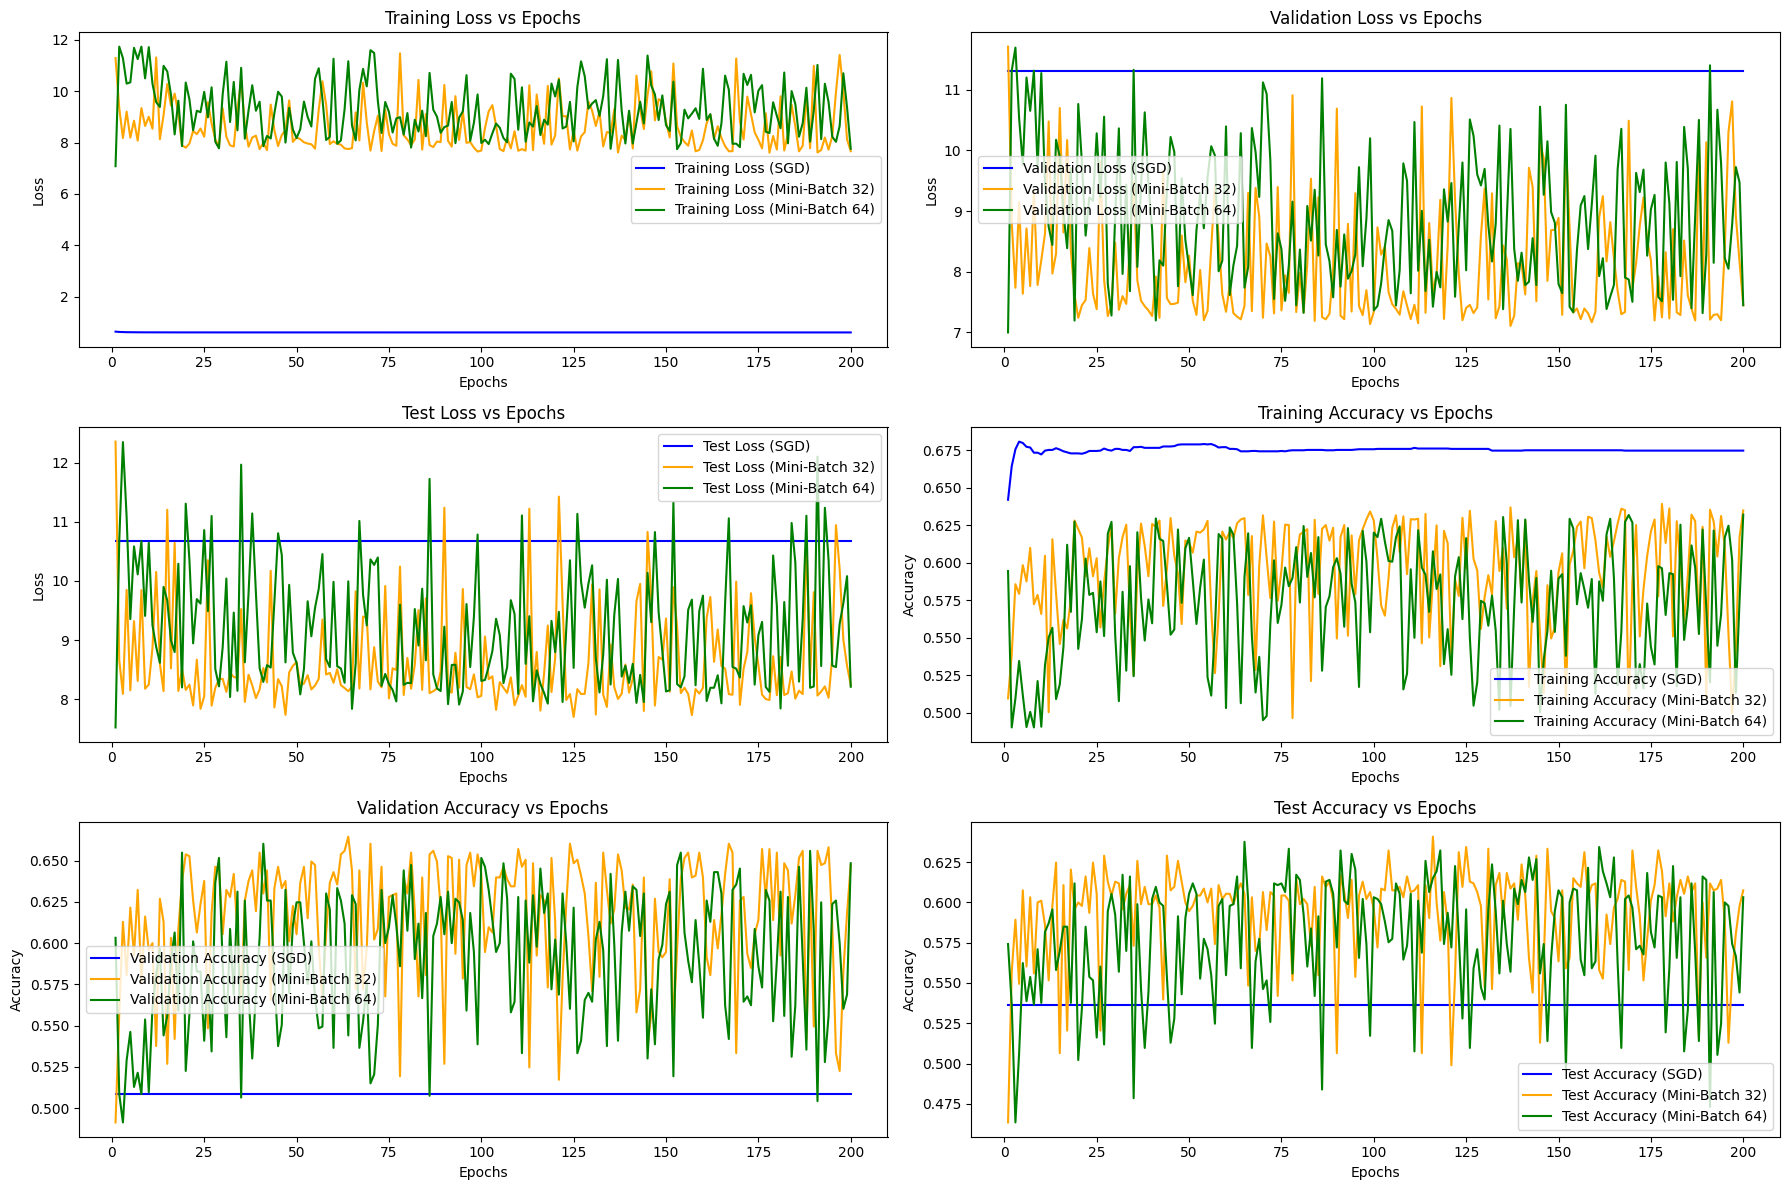

In [33]:
import matplotlib.pyplot as plt

def plot_results(train_loss_sgd, val_loss_sgd, test_loss_sgd,
                  train_loss_m32, val_loss_m32, test_loss_m32,
                  train_loss_m64, val_loss_m64, test_loss_m64,
                  train_acc_sgd, val_acc_sgd, test_acc_sgd,
                  train_acc_m32, val_acc_m32, test_acc_m32,
                  train_acc_m64, val_acc_m64, test_acc_m64):

    epochs = range(1, len(train_loss_sgd) + 1)  # Ensure epochs match the length of loss/accuracy lists

    plt.figure(figsize=(18, 12))

    # Plot Training Loss
    plt.subplot(3, 2, 1)
    plt.plot(epochs, train_loss_sgd, label='Training Loss (SGD)', color='blue')
    plt.plot(epochs, train_loss_m32, label='Training Loss (Mini-Batch 32)', color='orange')
    plt.plot(epochs, train_loss_m64, label='Training Loss (Mini-Batch 64)', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Epochs')
    plt.legend()

    # Plot Validation Loss
    plt.subplot(3, 2, 2)
    plt.plot(epochs, val_loss_sgd, label='Validation Loss (SGD)', color='blue')
    plt.plot(epochs, val_loss_m32, label='Validation Loss (Mini-Batch 32)', color='orange')
    plt.plot(epochs, val_loss_m64, label='Validation Loss (Mini-Batch 64)', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Validation Loss vs Epochs')
    plt.legend()

    # Plot Test Loss
    plt.subplot(3, 2, 3)
    plt.plot(epochs, test_loss_sgd, label='Test Loss (SGD)', color='blue')
    plt.plot(epochs, test_loss_m32, label='Test Loss (Mini-Batch 32)', color='orange')
    plt.plot(epochs, test_loss_m64, label='Test Loss (Mini-Batch 64)', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Test Loss vs Epochs')
    plt.legend()

    # Plot Training Accuracy
    plt.subplot(3, 2, 4)
    plt.plot(epochs, train_acc_sgd, label='Training Accuracy (SGD)', color='blue')
    plt.plot(epochs, train_acc_m32, label='Training Accuracy (Mini-Batch 32)', color='orange')
    plt.plot(epochs, train_acc_m64, label='Training Accuracy (Mini-Batch 64)', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy vs Epochs')
    plt.legend()

    # Plot Validation Accuracy
    plt.subplot(3, 2, 5)
    plt.plot(epochs, val_acc_sgd, label='Validation Accuracy (SGD)', color='blue')
    plt.plot(epochs, val_acc_m32, label='Validation Accuracy (Mini-Batch 32)', color='orange')
    plt.plot(epochs, val_acc_m64, label='Validation Accuracy (Mini-Batch 64)', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy vs Epochs')
    plt.legend()

    # Plot Test Accuracy
    plt.subplot(3, 2, 6)
    plt.plot(epochs, test_acc_sgd, label='Test Accuracy (SGD)', color='blue')
    plt.plot(epochs, test_acc_m32, label='Test Accuracy (Mini-Batch 32)', color='orange')
    plt.plot(epochs, test_acc_m64, label='Test Accuracy (Mini-Batch 64)', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Test Accuracy vs Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_results(costs_train_sgd, costs_val_sgd, costs_test_sgd,
             costs_train_m32, costs_val_m32, costs_test_m32,
             costs_train_m64, costs_val_m64, costs_test_m64,
             accuracies_train_sgd, accuracies_val_sgd, accuracies_test_sgd,
             accuracies_train_m32, accuracies_val_m32, accuracies_test_m32,
             accuracies_train_m64, accuracies_val_m64, accuracies_test_m64)



# **Part (e)**

In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [99]:
class LogisticRegressionS:
    def __init__(self, learn_rate=0.01, iterations=1000):
        self.wts = None
        self.bias = None
        self.iterations = iterations
        self.learn_rate = learn_rate

    def sigmoid_func(self, z):
        logit = 1 + np.exp(-z)
        return 1/logit

    def train_model(self, X, Y):

        m, no_of_features = X.shape
        #Initialization

        self.wts = np.zeros(no_of_features)
        self.bias = 0

        for iteration in range(self.iterations):

            z = np.dot(X, self.wts) + self.bias

            y_predicted = self.sigmoid_func(z)

            # gradients for weights and bias
            wt_gradient = (1/m)*(np.dot(X.T, (y_predicted - Y)))

            bs_gradient = (1/m)*(np.sum(y_predicted - Y))

            self.wts = self.wts -  self.learn_rate * wt_gradient

            self.bias = self.bias - self.learn_rate * bs_gradient

    def predict_class(self, X):

        z = np.dot(X, self.wts) + self.bias
        hypothesis_ys = self.sigmoid_func(z)

        hypo_class = [1 if  i >= 0.5 else 0 for i in hypothesis_ys]

        return np.array(hypo_class)

In [88]:
X, Y = load_and_preprocess('./Heart_Disease.csv')
X_resampled, Y_resampled = resampling(X, Y)
X_scaled_resampled = min_max_scaling(X_resampled)

(6198, 15)
[0 0 0 ... 1 1 1]


In [119]:
def k_fold_cross_validation(X, Y, model, k=5):

    #calculating performance metrics for each fold
    fold_accuracies = []
    fold_precisions = []
    fold_sensitivities = []
    fold_f1_scores = []

    len_x = len(X)
    size_of_fold = len_x // k

    indexes = np.arange(len_x)
    np.random.shuffle(indexes)



    for fold in range(k):
        #First fold is defined as validation set
        validation_indices = indexes[fold*size_of_fold : (fold + 1)*size_of_fold]
        #Rest k -1 folds will be used for training the model
        training_indices = np.concatenate([indexes[ : fold*size_of_fold], indexes[(fold + 1)*size_of_fold : ]])

        X_train = X[training_indices]
        y_train = Y[training_indices]

        X_val =  X[validation_indices]
        y_val = Y[validation_indices]

        model.train_model(X_train, y_train)

        y_val_pred = model.predict_class(X_val)

        # Calculate metrics
        fold_accuracies.append(accuracy_score(y_val, y_val_pred))

        fold_precisions.append(precision_score(y_val, y_val_pred, zero_division=0))
        fold_sensitivities.append(recall_score(y_val, y_val_pred, zero_division=0))

        fold_f1_scores.append(f1_score(y_val, y_val_pred, zero_division=0))

    #Average of each performance metri:
    return {
        'accuracy': (np.mean(fold_accuracies), np.std(fold_accuracies)),
        'precision': (np.mean(fold_precisions), np.std(fold_precisions)),
        'sensitivity': (np.mean(fold_sensitivities), np.std(fold_sensitivities)),
        'f1-score': (np.mean(fold_f1_scores), np.std(fold_f1_scores))
    }, fold_accuracies, fold_precisions, fold_sensitivities, fold_f1_scores


In [80]:
def performance_analysis(res):
    compute_analysis = {}
    performance_metrics = ['accuracy', 'precision', 'sensitivity', 'f1-score']

    for performance_metric in performance_metrics:

        avg, std_dev = res[performance_metric]
        compute_analysis[performance_metric] = { 'average': avg, 'standard_deviation': std_dev}

    return compute_analysis

In [91]:
logistic_model = LogisticRegressionS(learn_rate=0.01, iterations=1000)
res, fold_accuracies, fold_precisions, fold_sensitivities, fold_f1_scores = k_fold_cross_validation(X_scaled_resampled, Y_resampled, logistic_model, k=5)

print(res)


{'accuracy': (0.6413236481033091, 0.009906011940317216), 'precision': (0.6240608736568413, 0.02312469536645293), 'sensitivity': (0.7172002320274864, 0.03144500730478015), 'f1-score': (0.6663439870913825, 0.005719193362404024)}


In [92]:
print("5-Fold Cross-Validation Performance Analysis (Logistic Regression):")

print("Average Metrics:")
print(f"Accuracy : {res['accuracy'][0]:.4f} ± {res['accuracy'][1]:.4f}")

print(f"Precision : {res['precision'][0]:.4f} ± {res['precision'][1]:.4f}")
print(f"Sensitivity : {res['sensitivity'][0]:.4f} ± {res['sensitivity'][1]:.4f}")

print(f"F1- Score: {res['f1-score'][0]:.4f} ± {res['f1-score'][1]:.4f}")

5-Fold Cross-Validation Performance Analysis (Logistic Regression):
Average Metrics:
Accuracy : 0.6413 ± 0.0099
Precision : 0.6241 ± 0.0231
Sensitivity : 0.7172 ± 0.0314
F1- Score: 0.6663 ± 0.0057


In [93]:

print("\nFold-wise Metrics:")

for i in range(len(fold_accuracies)):
    print(f"Fold {i + 1}:")
    print(f"  Accuracy : {fold_accuracies[i]:.4f}")
    print(f"  Precision : {fold_precisions[i]:.4f}")

    print(f"  Sensitivity : {fold_sensitivities[i]:.4f}")

    print(f"  F1- Score : {fold_f1_scores[i]:.4f}")


Fold-wise Metrics:
Fold 1:
  Accuracy : 0.6449
  Precision : 0.6134
  Sensitivity : 0.7504
  F1- Score : 0.6750
Fold 2:
  Accuracy : 0.6336
  Precision : 0.6334
  Sensitivity : 0.7003
  F1- Score : 0.6652
Fold 3:
  Accuracy : 0.6263
  Precision : 0.5882
  Sensitivity : 0.7487
  F1- Score : 0.6588
Fold 4:
  Accuracy : 0.6489
  Precision : 0.6270
  Sensitivity : 0.7199
  F1- Score : 0.6702
Fold 5:
  Accuracy : 0.6529
  Precision : 0.6583
  Sensitivity : 0.6667
  F1- Score : 0.6625


# **Part (f)**

In [122]:
from sklearn.metrics import log_loss, accuracy_score
import numpy as np

class LogisticRegressionWithEarlyStopping:
    def __init__(self, learn_rate=0.01, iterations=1000, size_of_batch=64, patience=10, lamda_l1=0.01, lamda_l2=0.01, regularization='none', early_stopping=True):
        self.lr = learn_rate
        self.iterations = iterations
        self.size_of_batch = size_of_batch
        self.patience = patience
        self.lamda_l1 = lamda_l1  # L1 regularization strength
        self.lamda_l2 = lamda_l2  # L2 regularization strength
        self.regularization = regularization  # 'l1', 'l2', or 'elastic_net'
        self.early_stopping = early_stopping
        self.wts = None
        self.bias = None
        self.costs_train = []
        self.costs_val = []
        self.accuracy_train = []
        self.accuracy_val = []

    def sigmoid_func(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = X.shape[0]
        z = np.dot(X, self.wts) + self.bias
        y_predicted_hypothesis = self.sigmoid_func(z)

        basic_loss = log_loss(y, y_predicted_hypothesis)

        if self.regularization == 'l1':
            regularization_cost = self.lamda_l1 * np.sum(np.abs(self.wts)) / m
        elif self.regularization == 'l2':
            regularization_cost = (self.lamda_l2 / 2) * np.sum(np.square(self.wts)) / m
        elif self.regularization == 'elastic_net':
            regularization_cost = (self.lamda_l1 * np.sum(np.abs(self.wts)) + self.lamda_l2 / 2 * np.sum(np.square(self.wts))) / m
        else:
            regularization_cost = 0

        return basic_loss + regularization_cost

    def train_model(self, X_train, y_train, X_val, y_val):
        m, n_features = X_train.shape
        self.wts = np.zeros(n_features)
        self.bias = 0

        best_valLoss_till_now = float('inf')
        iterations_without_improvement_till_now = 0
        best_wts_tillnow = None
        best_bias_tillnow = None

        for epoch in range(self.iterations):
            indexes = np.arange(m)
            np.random.shuffle(indexes)

            for i in range(0, m, self.size_of_batch):
                X_batch = X_train[indexes[i:i + self.size_of_batch]]
                y_batch = y_train[indexes[i:i + self.size_of_batch]]

                z = np.dot(X_batch, self.wts) + self.bias
                y_predicted_hypothesis = self.sigmoid_func(z)

                dw = (1 / len(y_batch)) * np.dot(X_batch.T, (y_predicted_hypothesis - y_batch))
                db = (1 / len(y_batch)) * np.sum(y_predicted_hypothesis - y_batch)

                if self.regularization == 'l2':
                    dw += (self.lamda_l2 / len(y_batch)) * self.wts
                elif self.regularization == 'l1':
                    dw += (self.lamda_l1 / len(y_batch)) * np.sign(self.wts)
                elif self.regularization == 'elastic_net':
                    dw += (self.lamda_l1 / len(y_batch)) * np.sign(self.wts) + (self.lamda_l2 / len(y_batch)) * self.wts

                self.wts -= self.lr * dw
                self.bias -= self.lr * db

            train_loss = self.compute_cost(X_train, y_train)
            val_loss = self.compute_cost(X_val, y_val)

            self.costs_train.append(train_loss)
            self.costs_val.append(val_loss)


            train_predictions = self.sigmoid_func(np.dot(X_train, self.wts) + self.bias)

            val_predictions = self.sigmoid_func(np.dot(X_val, self.wts) + self.bias)

            train_acc = accuracy_score(y_train, (train_predictions > 0.5).astype(int))
            val_acc = accuracy_score(y_val, (val_predictions > 0.5).astype(int))


            self.accuracy_train.append(train_acc)
            self.accuracy_val.append(val_acc)

            if self.early_stopping:
                if val_loss < best_valLoss_till_now:
                    best_valLoss_till_now = val_loss
                    best_wts_tillnow = self.wts.copy()
                    best_bias_tillnow = self.bias
                    iterations_without_improvement_till_now = 0
                else:
                    iterations_without_improvement_till_now += 1
                    if iterations_without_improvement_till_now >= self.patience:
                        print(f"Early stopping triggered after epoch {epoch+1}")
                        self.wts = best_wts_tillnow
                        self.bias = best_bias_tillnow
                        break

    def predict_class(self, X):
        z = np.dot(X, self.wts) + self.bias
        y_predicted_hypothesis = self.sigmoid_func(z)
        return (y_predicted_hypothesis > 0.5).astype(int)


In [142]:
import matplotlib.pyplot as plt
import numpy as np

def train_logistic_regression(X_train, y_train, X_val, y_val, learning_rate, iterations, patience, l1, l2, early_stop=True):
    model = LogisticRegressionWithEarlyStopping(
        learn_rate=learning_rate,
        iterations=iterations,
        size_of_batch=64,
        patience=patience,
        lamda_l1=l1,
        lamda_l2=l2,
        regularization='l1' if l1 > 0 else 'l2' if l2 > 0 else 'none',
        early_stopping=early_stop
    )
    model.train_model(X_train, y_train, X_val, y_val)

    return model.costs_train, model.costs_val, model.accuracy_train, model.accuracy_val

In [149]:

# Experiment with different settings
settings = [
    {"learning_rate": 0.01, "l1": 0.0, "l2": 0.0},  # No regularization
    {"learning_rate": 0.05, "l1": 0.0, "l2": 0.0},  #Learning rate = 0.05 with no regularization
    {"learning_rate": 0.1, "l1": 0.0, "l2": 0.0}, #Learning rate = 0.1 with no regularization
    {"learning_rate": 0.01, "l1": 0.0, "l2": 0.01},# L2 regularization
    {"learning_rate": 0.01, "l1": 0.1, "l2": 0.0},# L1 regularization
    {"learning_rate": 0.01, "l1": 0.01, "l2": 0.01},#L1 and L2 regularization
]





In [139]:
X,Y = load_and_preprocess('./Heart_Disease.csv')
X_resampled, Y_resampled = resampling(X, Y)
X_scaled_resampled = min_max_scaling(X_resampled)

X_train, X_val, y_train, y_val = train_test_split(X_scaled_resampled, Y_resampled, test_size=0.2, random_state=42)

(6198, 15)
[0 0 0 ... 1 1 1]


Training with learning rate=0.01, l1=0.0, l2=0.0
Early stopping triggered after epoch 699


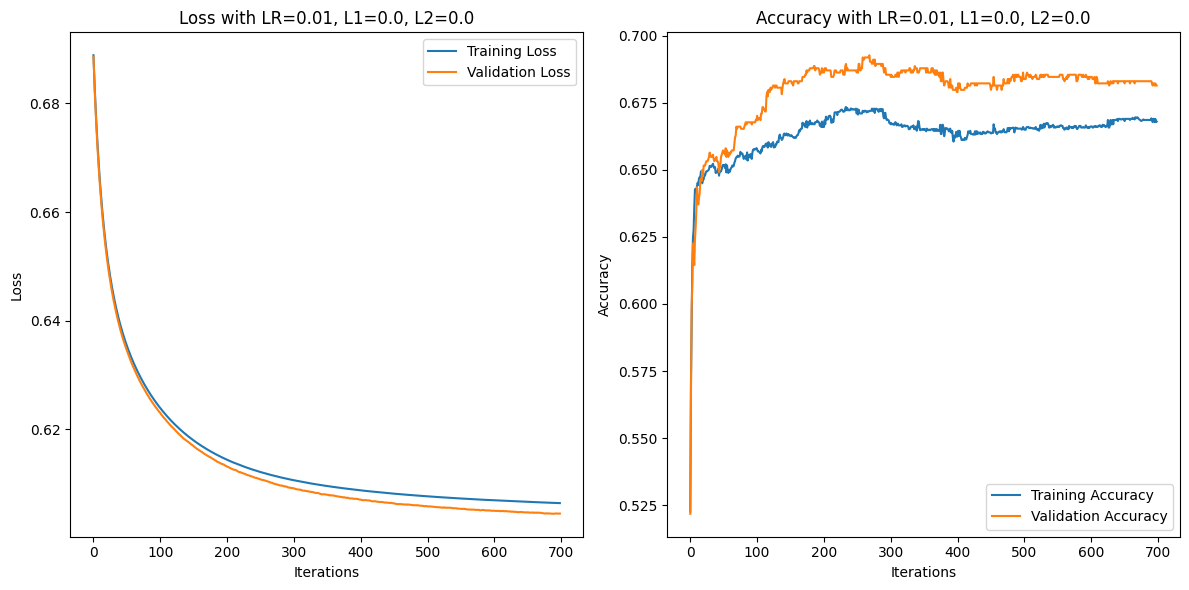

Training with learning rate=0.05, l1=0.0, l2=0.0
Early stopping triggered after epoch 161


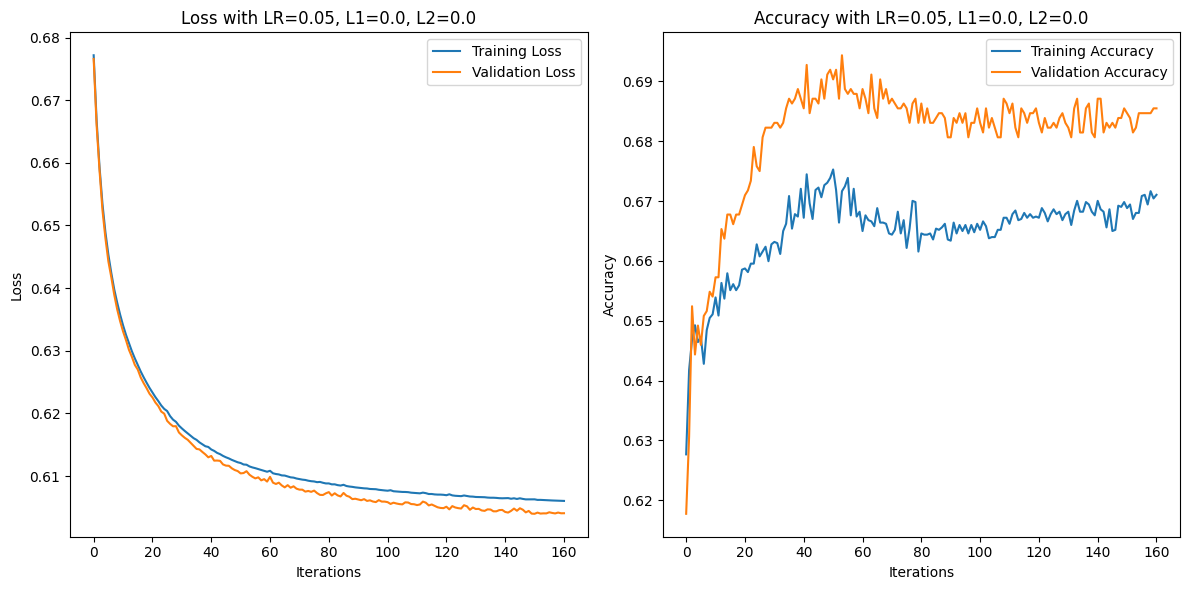

Training with learning rate=0.1, l1=0.0, l2=0.0
Early stopping triggered after epoch 102


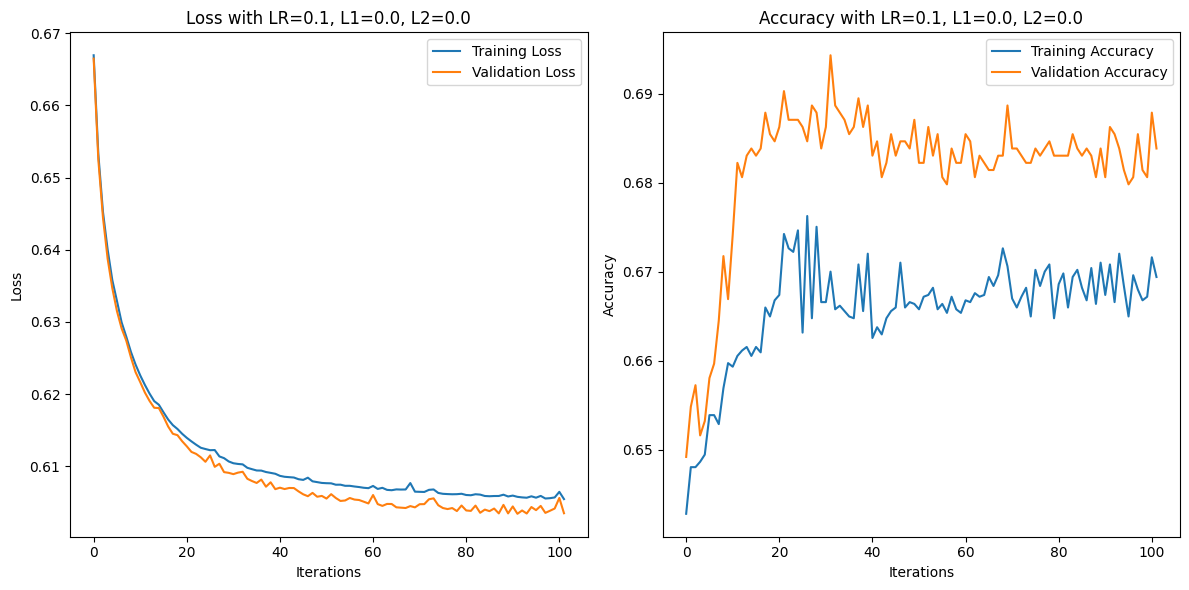

Training with learning rate=0.01, l1=0.0, l2=0.01
Early stopping triggered after epoch 742


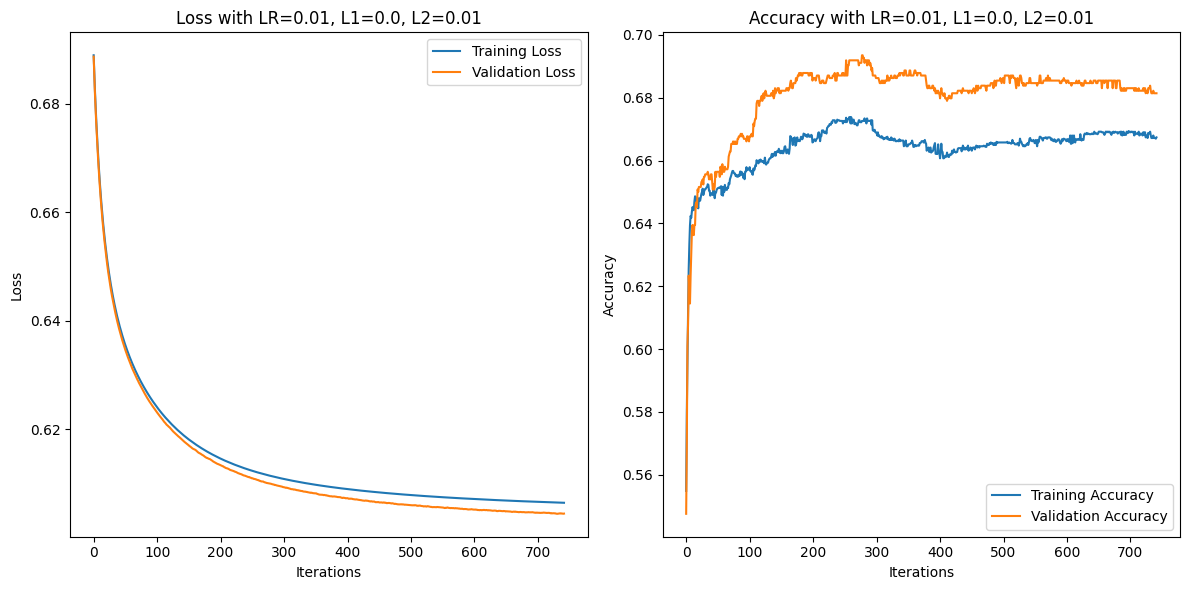

Training with learning rate=0.01, l1=0.1, l2=0.0
Early stopping triggered after epoch 675


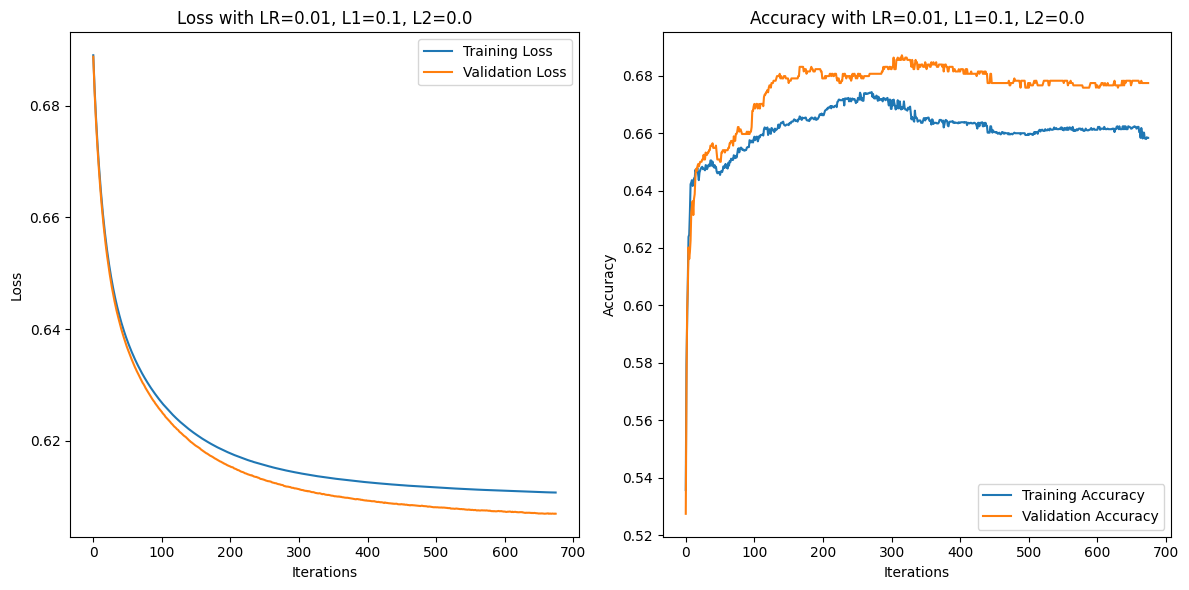

Training with learning rate=0.01, l1=0.01, l2=0.01
Early stopping triggered after epoch 695


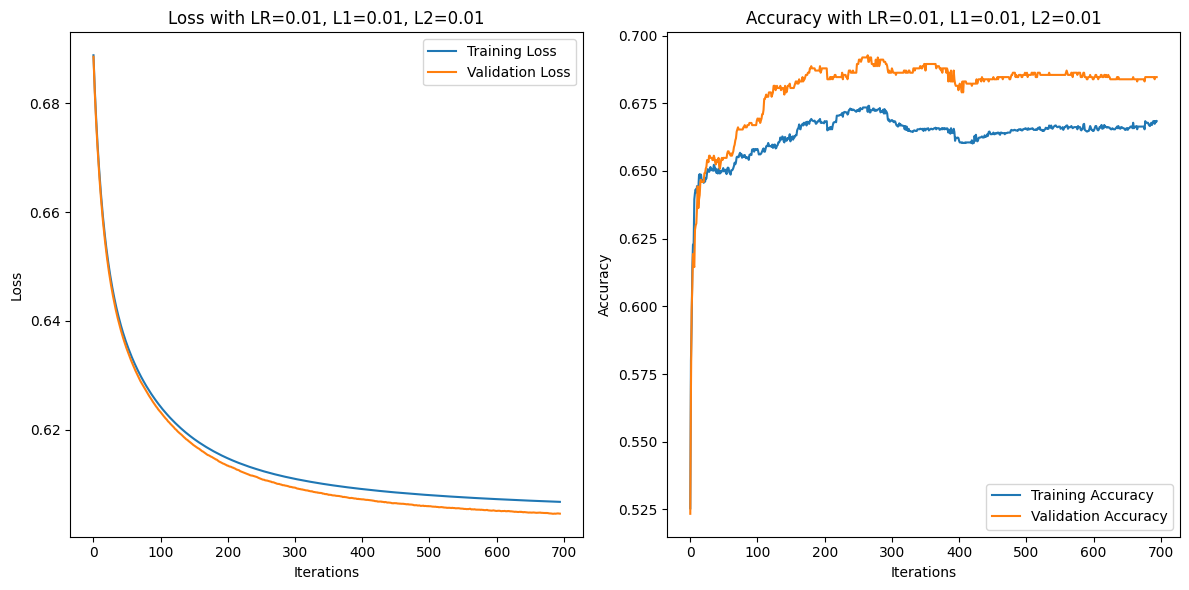

In [150]:
for setting in settings:
    learning_rate = setting["learning_rate"]
    l1 = setting["l1"]
    l2 = setting["l2"]

    print(f"Training with learning rate={learning_rate}, l1={l1}, l2={l2}")

    train_loss_history, val_loss_history, train_acc_history, val_acc_history = train_logistic_regression(
        X_train, y_train, X_val, y_val, learning_rate=learning_rate, iterations=1000, patience=10, l1=l1, l2=l2, early_stop=True
    )

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Training Loss')

    plt.plot(val_loss_history, label='Validation Loss')

    plt.xlabel('Iterations')

    plt.ylabel('Loss')
    plt.title(f'Loss with LR={learning_rate}, L1={l1}, L2={l2}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Training Accuracy')
    plt.plot(val_acc_history, label='Validation Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy with LR={learning_rate}, L1={l1}, L2={l2}')
    plt.legend()

    plt.tight_layout()
    plt.show()

Early stopping triggered after epoch 688


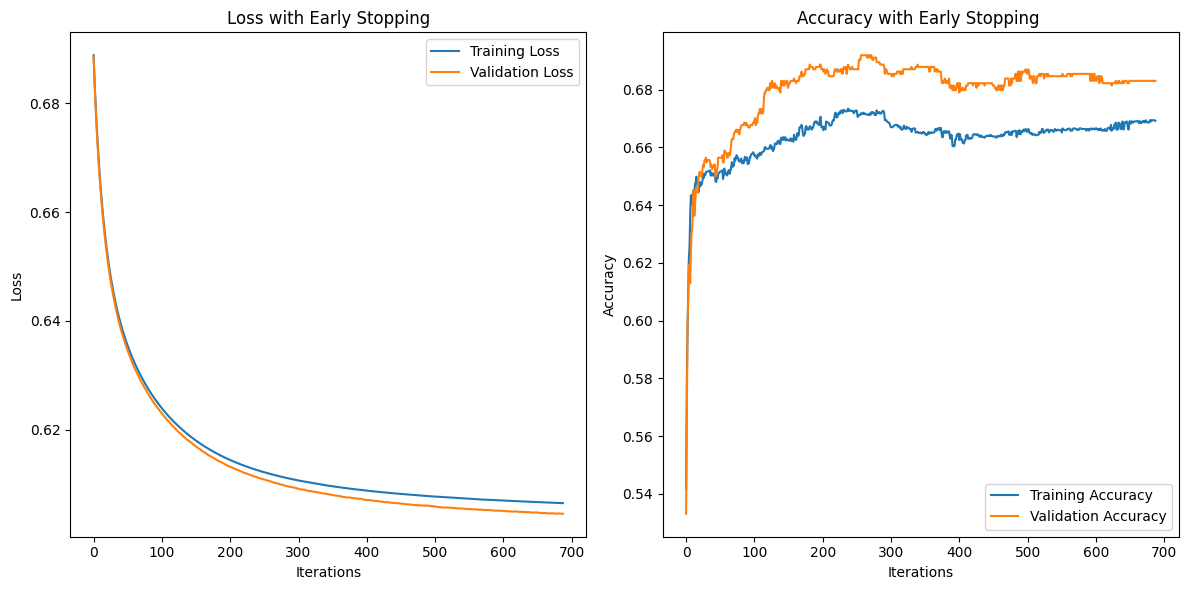

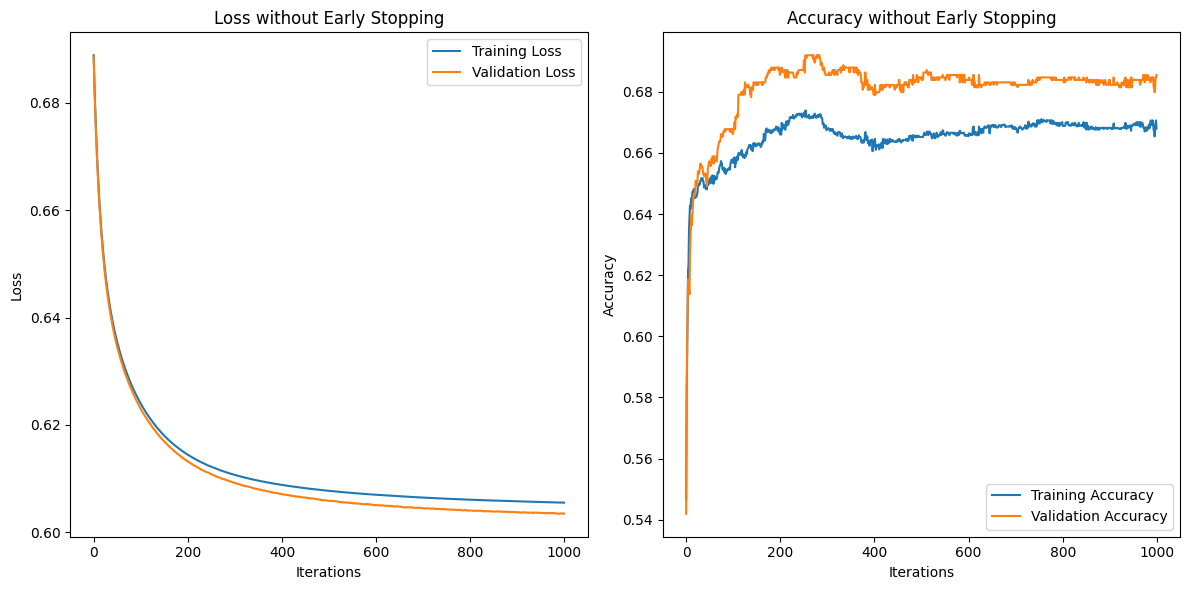

In [147]:
    train_loss_history, val_loss_history, train_acc_history, val_acc_history = train_logistic_regression( X_train, y_train, X_val, y_val, learning_rate=0.01, iterations=1000, patience=10, l1=0, l2=0, early_stop=True)


    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Training Loss')

    plt.plot(val_loss_history, label='Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')

    plt.title(f'Loss with Early Stopping')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Training Accuracy')
    plt.plot(val_acc_history, label='Validation Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy with Early Stopping ')
    plt.legend()

    plt.tight_layout()
    plt.show()

    train_loss_history, val_loss_history, train_acc_history, val_acc_history = train_logistic_regression(X_train, y_train, X_val, y_val, learning_rate=0.01, iterations=1000, patience=10, l1=0, l2=0, early_stop=False)
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Training Loss')

    plt.plot(val_loss_history, label='Validation Loss')

    plt.xlabel('Iterations')

    plt.ylabel('Loss')
    plt.title(f'Loss without Early Stopping')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Training Accuracy')

    plt.plot(val_acc_history, label='Validation Accuracy')

    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy without Early Stopping')

    plt.legend()

    plt.tight_layout()
    plt.show()


# Section C

# **Part (a)**

In [151]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [164]:
def loadData(file_path):
  df = pd.read_csv('Electricity_BILL.csv')
  return df


In [166]:
def splitDataIntoTrainandTest(df):
  X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

  return X_train, X_test

In [154]:
numerical_features = ['Construction_Year','Number_of_Floors', 'Energy_Consumption_Per_SqM', 'Waste_Recycled_Percentage','Indoor_Air_Quality','Smart_Devices_Count', 'Maintenance_Resolution_Time', 'Energy_Per_SqM', 'Number_of_Residents', 'Electricity_Bill']
categorical_features = ['Building_Type', 'Building_Status', 'Maintenance_Priority', 'Green_Certified']

<bound method NDFrame.head of       Building_Type  Construction_Year  Number_of_Floors  \
1194    Residential               1994                12   
911   Institutional               1984                13   
422   Institutional               2005                 4   
670     Residential               1974                 1   
931      Commercial               1984                11   
...             ...                ...               ...   
1044     Commercial               2017                13   
1095     Commercial               2013                 6   
1130     Commercial               1986                11   
860      Industrial               2015                 2   
1126     Commercial               2011                 3   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
1194                   50.000000                580.606931   
911                    50.000000                970.030615   
422                    50.000000               1500.000000   
6

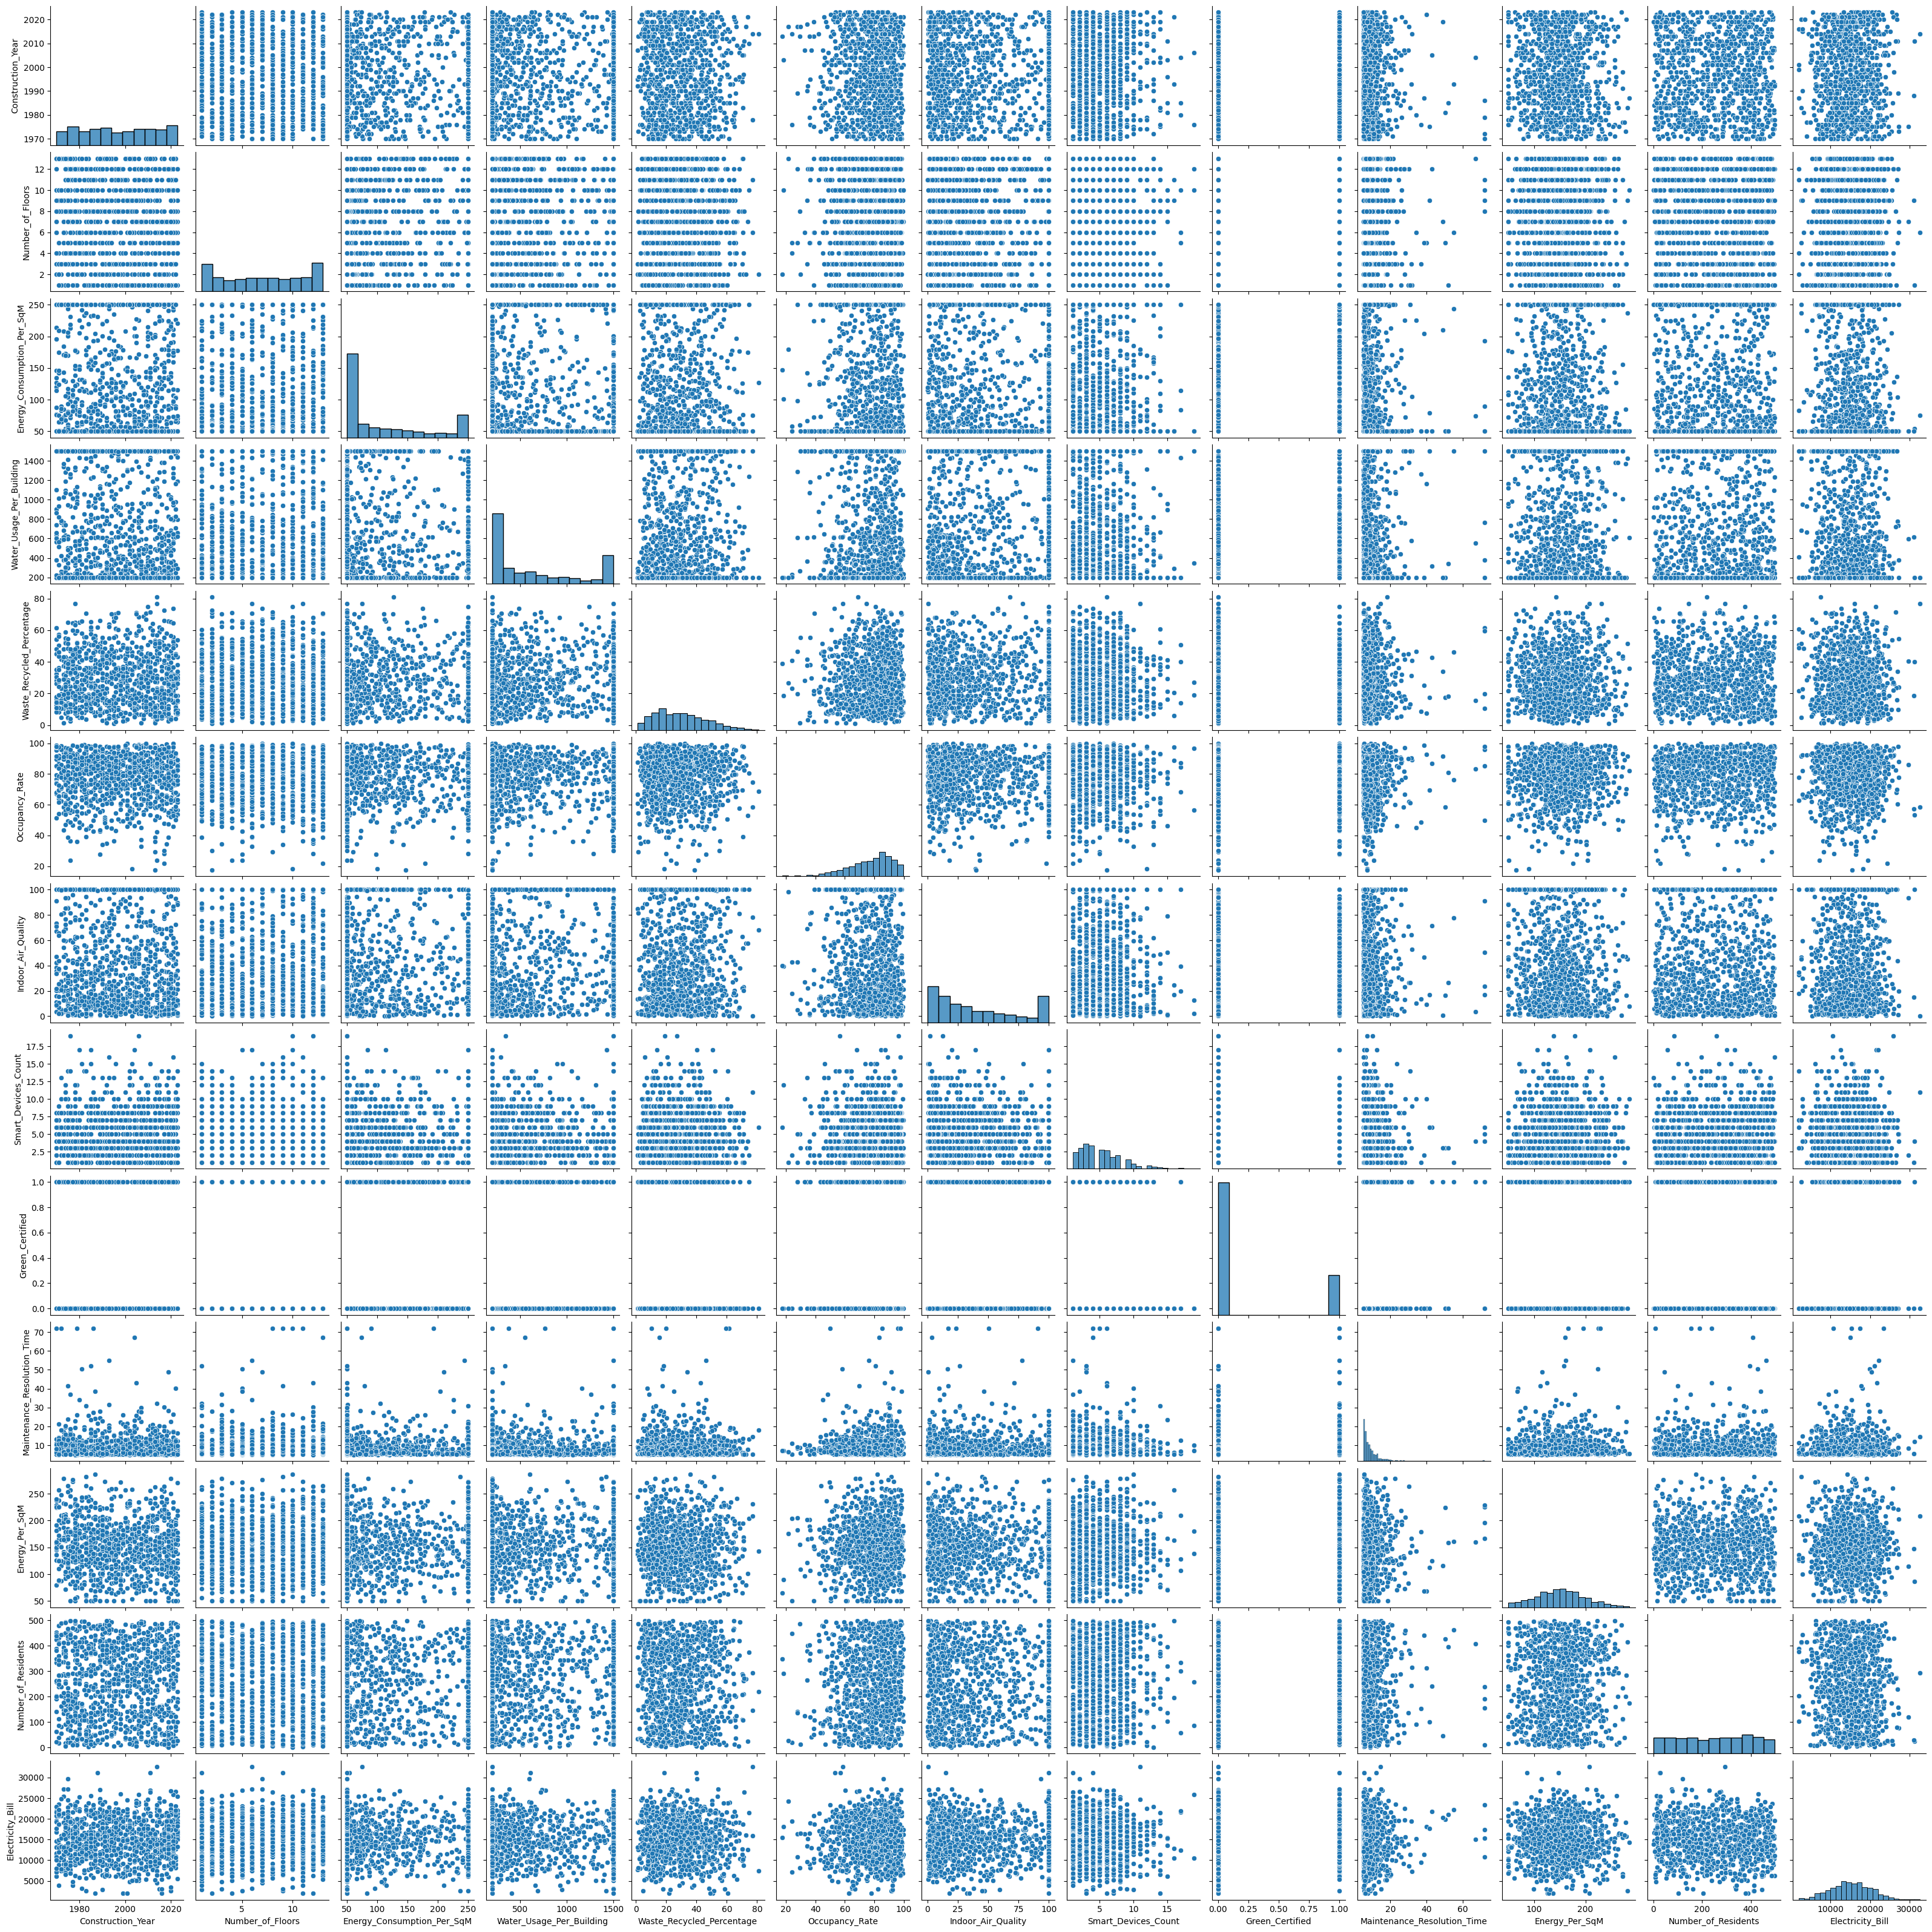

In [168]:
df = loadData('./Electricity_BILL.csv')
# print(df.head)
X_train, X_test = splitDataIntoTrainandTest(df)
sns.pairplot(X_train)
plt.show()

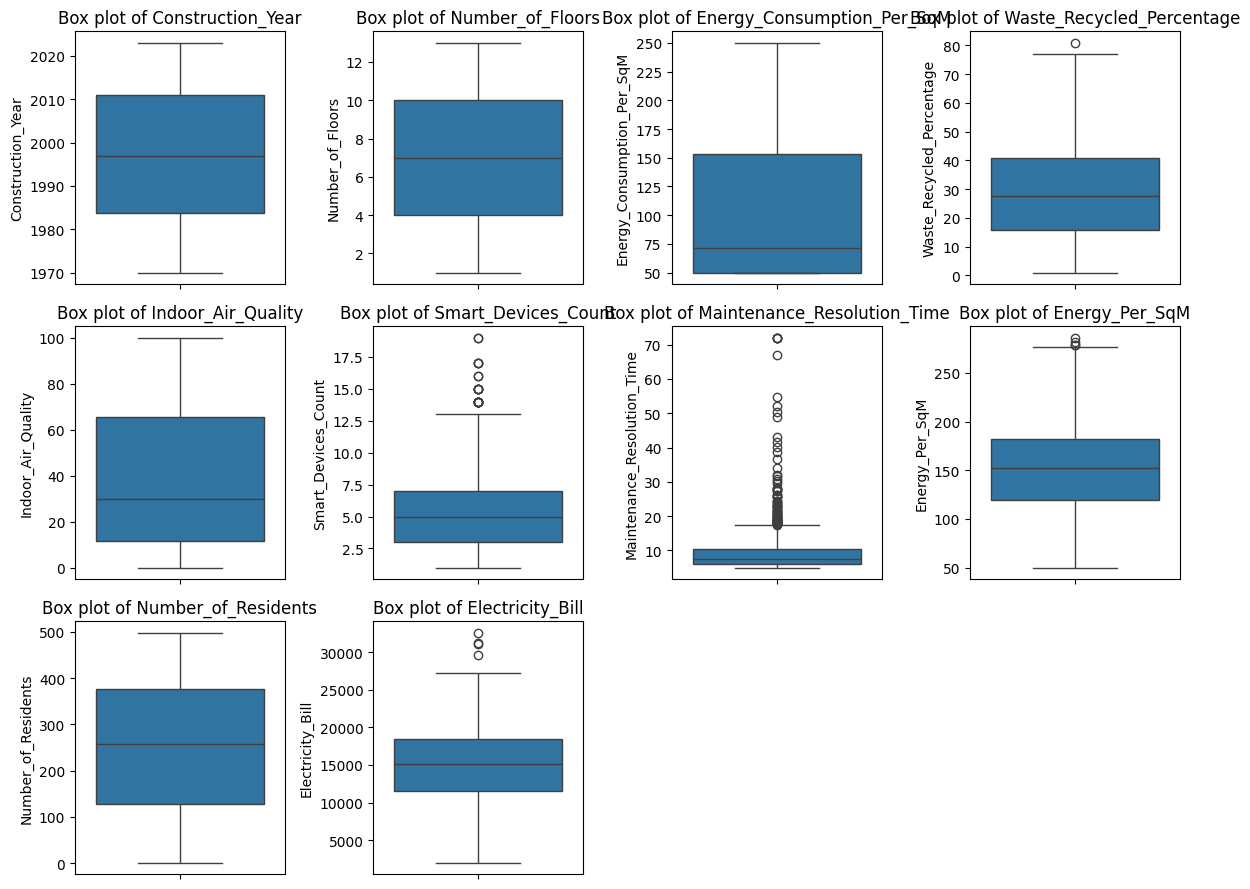

In [156]:
plt.figure(figsize=(12, 9))
for iter, feat in enumerate(numerical_features):

    plt.subplot(3, 4, iter + 1)

    sns.boxplot(data=X_train, y=feat)
    plt.title(f'Box plot of {feat}')
plt.tight_layout()
plt.show()

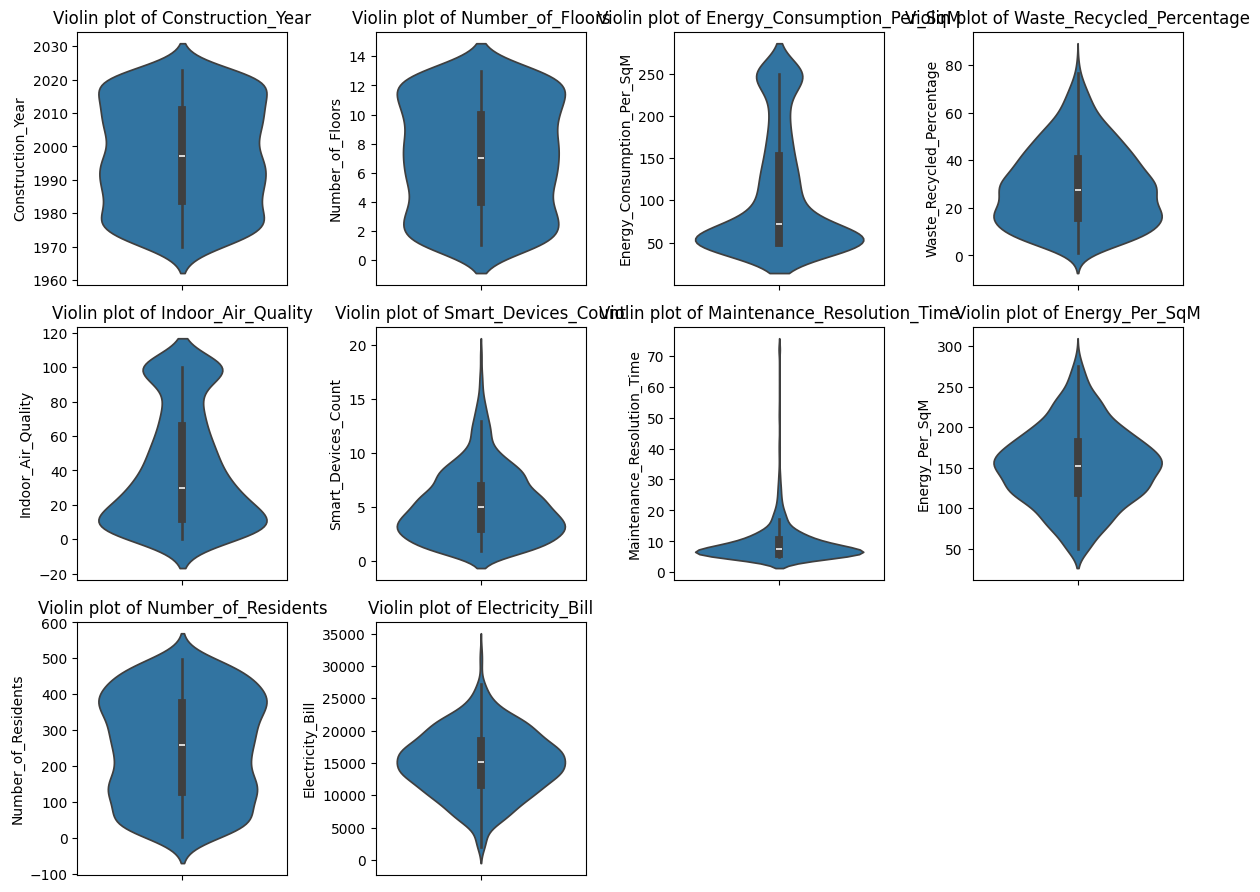

In [157]:
# Violin plots
plt.figure(figsize=(12, 9))

for iter, feat in enumerate(numerical_features):

    plt.subplot(3, 4, iter + 1)

    sns.violinplot(data=X_train, y=feat)

    plt.title(f'Violin plot of {feat}')
plt.tight_layout()
plt.show()

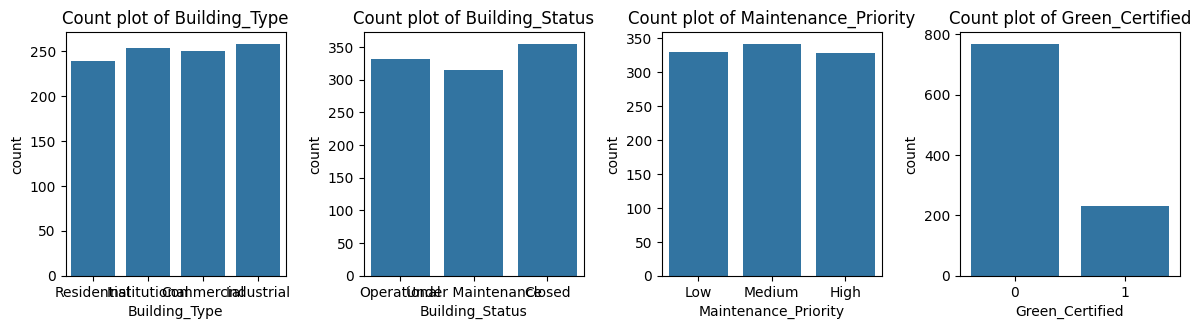

In [162]:
# Count plots for categorical features
plt.figure(figsize=(12, 9))

for iter, feat in enumerate(categorical_features):

    plt.subplot(3, 4, iter + 1)

    sns.countplot(data=X_train, x=feat)
    plt.title(f'Count plot of {feat}')


plt.tight_layout()
plt.show()

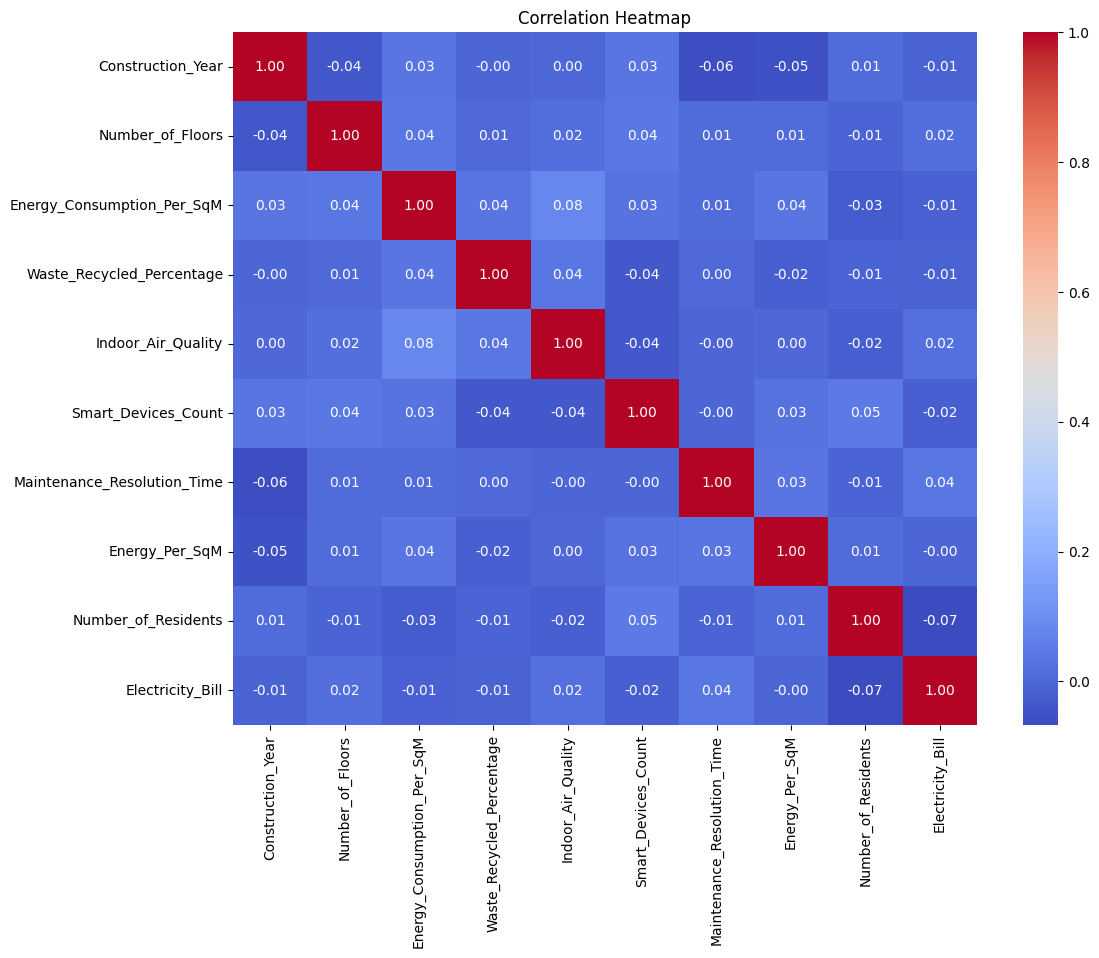

In [161]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 9))
corr_matrix = X_train[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Part (b)**

# **Part (c)**

In [169]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


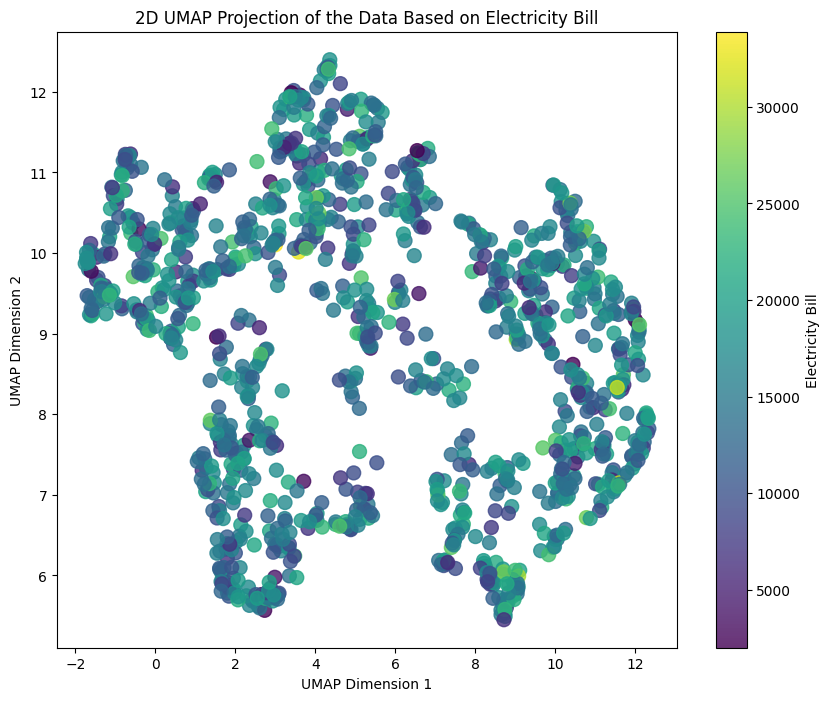

In [209]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Electricity_BILL.csv')

X = df.drop('Electricity_Bill', axis=1)

y = df['Electricity_Bill']


numerical_features = ['Construction_Year', 'Number_of_Floors', 'Energy_Consumption_Per_SqM',
                      'Waste_Recycled_Percentage', 'Indoor_Air_Quality', 'Smart_Devices_Count',
                      'Maintenance_Resolution_Time', 'Energy_Per_SqM', 'Number_of_Residents']
categorical_features = ['Building_Type', 'Building_Status', 'Maintenance_Priority', 'Green_Certified']



label_encoder = LabelEncoder()
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

X_train_combined = pd.concat([X[numerical_features], X[categorical_features]], axis=1)

reducer = umap.UMAP(n_components=2, random_state=42)
X_train_umap = reducer.fit_transform(X_train_combined)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y, cmap='viridis', s=100, alpha=0.8)

plt.colorbar(scatter, label='Electricity Bill')

plt.title('2D UMAP Projection of the Data Based on Electricity Bill')

plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


# **Part(c)**

In [208]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

def preprocess_data(df, numeric_cols, target_col):

    numeric_data = df[numeric_cols]
    categ_cols = df.select_dtypes(include=['object']).columns
    categ_data = df[categ_cols]
    if target_col in numerical_features:
      numeric_cols.remove(target_col)

    impute_numeric = SimpleImputer(strategy='mean')

    numeric_data = pd.DataFrame(impute_numeric.fit_transform(numeric_data), columns=numeric_cols)

    impute_categorical = SimpleImputer(strategy='most_frequent')
    categ_data = pd.DataFrame(impute_categorical.fit_transform(categ_data), columns=categ_cols)

    scaler = MinMaxScaler()
    numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_cols)

    encoders = {}

    for column in categ_cols:
        encoder = LabelEncoder()

        categ_data[column] = encoder.fit_transform(categ_data[column])

        encoders[column] = encoder

    data = pd.concat([numeric_data, categ_data], axis=1)

    data[target_col] = df[target_col].values

    return data, encoders


In [175]:
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

In [174]:
# Step 2.2: Metrics
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    explained_variance = np.sum((y_true - y_pred) ** 2)
    return 1 - (explained_variance / total_variance)

def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [182]:
data = pd.read_csv('./Electricity_BILL.csv')

In [207]:
# Step 4: Putting it all together
def train_and_evaluate(df, target_column, numerical_features):
    # Preprocess data
    processed_data, label_encoders = preprocess_data(df, numerical_features, target_column)
    X = processed_data.drop(target_column, axis=1).values

    Y = processed_data[target_column].values

    X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, Y_train)

    y_train_pred = model.predict(X_train)


    y_test_pred = model.predict(X_test)

    # train data
    train_mse = mean_squared_error(Y_train, y_train_pred)
    train_rmse = root_mean_squared_error(Y_train, y_train_pred)

    train_mae = mean_absolute_error(Y_train, y_train_pred)

    train_r2 = r2_score(Y_train, y_train_pred)
    train_adjusted_r2 = adjusted_r2_score(Y_train, y_train_pred, X_train.shape[0], X_train.shape[1])

    print("Train Data:")
    print("MSE :-", mean_squared_error(Y_train, y_train_pred))

    print("RMSE :-", root_mean_squared_error(Y_train, y_train_pred))

    print("MAE :-", mean_absolute_error(Y_train, y_train_pred))

    print("R2 Score :-", r2_score(Y_train, y_train_pred))

    print("Adjusted R2 Score :-", adjusted_r2_score(Y_train, y_train_pred, X_train.shape[0], X_train.shape[1]))

    #  test data
    print("\nTest Data:")
    print("MSE :-", mean_squared_error(y_test, y_test_pred))
    print("RMSE :-", root_mean_squared_error(y_test, y_test_pred))
    print("MAE -:", mean_absolute_error(y_test, y_test_pred))
    print("R2 Score :-", r2_score(y_test, y_test_pred))
    print("Adjusted R2 Score :-", adjusted_r2_score(y_test, y_test_pred, X_test.shape[0], X_test.shape[1]))

In [184]:
target_column = 'Electricity_Bill'
train_and_evaluate(data, target_column, numerical_features)

Train Data:
MSE :- 24553562.280891553
RMSE :- 4955.155121778888
MAE :- 4000.0400072070274
R2 Score :- 0.010757843864542038
Adjusted R2 Score :- -0.001269416392424061

Test Data:
MSE :- 24505841.579286285
RMSE :- 4950.337521754076
MAE -: 3850.786546806548
R2 Score :- -0.009346326239157099
Adjusted R2 Score :- -0.060452469339873804


# **Part (d)**

In [185]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def train_and_evaluate(df, target_col, numerical_features):

    X = df[numerical_features]
    Y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model = LinearRegression()

    # RFE- select top 3 features
    rfe = RFE(model, n_features_to_select=3)


    rfe.fit(X_train, y_train)

    selected_feats = [feat for feat, selected in zip(numerical_features, rfe.support_) if selected]
    print("Top 3 features selected by RFE:", selected_feats)

    # Train model with selected features
    X_train_selected = X_train[selected_feats]

    X_test_selected = X_test[selected_feats]

    model.fit(X_train_selected, y_train)

    y_train_pred_rfe = model.predict(X_train_selected)

    y_test_pred_rfe = model.predict(X_test_selected)

    # train data- Performance
    print("RFE - Train Data:")
    print("MSE:", mean_squared_error(y_train, y_train_pred_rfe))
    print("RMSE:", root_mean_squared_error(y_train, y_train_pred_rfe))
    print("MAE:", mean_absolute_error(y_train, y_train_pred_rfe))
    print("R2 Score:", r2_score(y_train, y_train_pred_rfe))
    print("Adjusted R2 Score:", adjusted_r2_score(y_train, y_train_pred_rfe, X_train_selected.shape[0], X_train_selected.shape[1]))

    # Test data - Perforrmance
    print("\nRFE - Test Data:")
    print("MSE:", mean_squared_error(y_test, y_test_pred_rfe))
    print("RMSE:", root_mean_squared_error(y_test, y_test_pred_rfe))
    print("MAE:", mean_absolute_error(y_test, y_test_pred_rfe))
    print("R2 Score:", r2_score(y_test, y_test_pred_rfe))
    print("Adjusted R2 Score:", adjusted_r2_score(y_test, y_test_pred_rfe, X_test_selected.shape[0], X_test_selected.shape[1]))


In [186]:
train_and_evaluate(data, target_column, numerical_features)

Top 3 features selected by RFE: ['Number_of_Floors', 'Smart_Devices_Count', 'Maintenance_Resolution_Time']
RFE - Train Data:
MSE: 24757308.526249778
RMSE: 4975.671665840681
MAE: 4013.8708515415333
R2 Score: 0.0025490808037321733
Adjusted R2 Score: -0.00045528943481087936

RFE - Test Data:
MSE: 24619736.33685434
RMSE: 4961.827922938716
MAE: 3867.891642295807
R2 Score: -0.014037422227730856
Adjusted R2 Score: -0.026403732254898227


# **Part (e)**

In [187]:
data = pd.read_csv('./Electricity_BILL.csv')

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


categorical_columns = ['Building_Type', 'Building_Status', 'Maintenance_Priority', 'Green_Certified']
encod = OneHotEncoder(sparse_output=False, drop='first')

encoded_categorical_data = encod.fit_transform(data[categorical_columns])

encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encod.get_feature_names_out(categorical_columns))

# Combining encoded columns with the rest
numeric_data = data.drop(columns=categorical_columns + ['Electricity_Bill'])  # Assuming 'Electricity_Bill' is the target column
X = pd.concat([numeric_data, encoded_categorical_df], axis=1)

y = data['Electricity_Bill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression model
model = Ridge()
model.fit(X_train, y_train)

# Predict/Hypothesis
y_train_hypo = model.predict(X_train)
y_test_hypo = model.predict(X_test)

def performance_metrics(y_true, y_pred, n, p):

    mse = mean_squared_error(y_true, y_pred)

    rmse = np.sqrt(mse)


    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return mse, rmse, mae, r2, adjusted_r2


n_train, p_train = X_train.shape
train_metrics = performance_metrics(y_train, y_train_hypo, n_train, p_train)


n_test, p_test = X_test.shape
test_metrics = performance_metrics(y_test, y_test_hypo, n_test, p_test)

print("Training Set Evaluation Metrics:")
print(f"MSE :- {train_metrics[0]}")
print(f"RMSE. :- {train_metrics[1]}")
print(f"MAE :- {train_metrics[2]}")
print(f"R² Score:- {train_metrics[3]}")
print(f"Adjusted R² Score --: {train_metrics[4]}\n")

print("Testing Set Evaluation Metrics:")
print(f"MSE :- {test_metrics[0]}")
print(f"RMSE. :- {test_metrics[1]}")
print(f"MAE :--  {test_metrics[2]}")
print(f"R²: {test_metrics[3]}")
print(f"Adjusted R² -: {test_metrics[4]}")


Training Set Evaluation Metrics:
MSE :- 24188936.71529504
RMSE. :- 4918.224955743183
MAE :- 3976.694459809908
R² Score:- 0.02544829800583437
Adjusted R² Score --: 0.006553928273294374

Testing Set Evaluation Metrics:
MSE :- 24129257.316123597
RMSE. :- 4912.154040349671
MAE :--  3797.611567420423
R²: 0.006164422139467329
Adjusted R² -: -0.07593503864031592


# Part (f)

In [190]:
from sklearn.decomposition import FastICA

def ICAevaluation(n_comp):

    ica = FastICA(n_components=n_comp, random_state=42)
    X_train_with_ica = ica.fit_transform(X_train)
    X_test_with_ica = ica.transform(X_test)

    ridge_model = Ridge()
    ridge_model.fit(X_train_with_ica, y_train)

    y_train_hypo = ridge_model.predict(X_train_with_ica)

    y_test_hypo = ridge_model.predict(X_test_with_ica)

    def evaluate_model(y_true, y_hypothesis, n, p):

        mse = mean_squared_error(y_true, y_hypothesis)

        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_hypothesis)

        r2 = r2_score(y_true, y_hypothesis)

        adjusted_r2 = 1 -(1 - r2)*(n - 1) / (n - p - 1)

        return mse, rmse, mae, r2, adjusted_r2

    n_train, p_train = X_train_with_ica.shape

    train_metrics = evaluate_model(y_train, y_train_hypo, n_train, p_train)
    # testing set
    n_test, p_test = X_test_with_ica.shape
    test_metrics = evaluate_model(y_test, y_test_hypo, n_test, p_test)

    return train_metrics, test_metrics


In [191]:
n_components = [4, 5, 6, 8]
res = {}

for n_comps in n_components:

    train_metrics, test_metrics = ICAevaluation(n_comps)

    res[n_comps] = {
        'train_metrics': train_metrics,

        'test_metrics': test_metrics

    }
print(res)



{4: {'train_metrics': (24701058.76240827, 4970.015972047602, 4010.983900100582, 0.004815335982028102, 0.000814593614116621), 'test_metrics': (24167219.341959227, 4916.01661327128, 3818.8935324450963, 0.004600842648029624, -0.011650572165880169)}, 5: {'train_metrics': (24683781.380049054, 4968.277506344533, 4008.435901682255, 0.00551142703317109, 0.0005089694226739772), 'test_metrics': (24261490.340966236, 4925.595430094339, 3831.4952084897286, 0.0007180098054699879, -0.019759080157532694)}, 6: {'train_metrics': (24682728.7313923, 4968.171568232351, 4009.3988194316876, 0.005553837352901603, -0.0004549007899812274), 'test_metrics': (24253810.365119897, 4924.8157696628505, 3829.85929972716, 0.0010343325639040613, -0.02363148638513546)}, 8: {'train_metrics': (24674426.130885158, 4967.335918868902, 4009.0377515644964, 0.005888342070924146, -0.0021367772665457085), 'test_metrics': (24222147.56471852, 4921.600102072345, 3830.1429308793377, 0.0023384596292886917, -0.03077893590168923)}}


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [192]:
# Results
for n_comps, metrics in  res.items() :

    print(f"Results for ICA with {n_comps} components:")
    print("Training Set Evaluation Metrics:")
    print(f"MSE : {metrics['train_metrics'][0]}")

    print(f"RMSE. : {metrics['train_metrics'][1]}")

    print(f"MAE : {metrics['train_metrics'][2]}")

    print(f"R². : {metrics['train_metrics'][3]}")
    print(f"Adjusted R². : {metrics['train_metrics'][4]}\n")

    print("Testing Set Evaluation Metrics:")

    print(f"MSE. : {metrics['test_metrics'][0]}")
    print(f"RMSE : {metrics['test_metrics'][1]}")

    print(f"MAE : {metrics['test_metrics'][2]}")
    print(f"R².  : {metrics['test_metrics'][3]}")


    print(f"Adjusted R². : {metrics['test_metrics'][4]}\n")

Results for ICA with 4 components:
Training Set Evaluation Metrics:
MSE : 24701058.76240827
RMSE. : 4970.015972047602
MAE : 4010.983900100582
R². : 0.004815335982028102
Adjusted R². : 0.000814593614116621

Testing Set Evaluation Metrics:
MSE. : 24167219.341959227
RMSE : 4916.01661327128
MAE : 3818.8935324450963
R².  : 0.004600842648029624
Adjusted R². : -0.011650572165880169

Results for ICA with 5 components:
Training Set Evaluation Metrics:
MSE : 24683781.380049054
RMSE. : 4968.277506344533
MAE : 4008.435901682255
R². : 0.00551142703317109
Adjusted R². : 0.0005089694226739772

Testing Set Evaluation Metrics:
MSE. : 24261490.340966236
RMSE : 4925.595430094339
MAE : 3831.4952084897286
R².  : 0.0007180098054699879
Adjusted R². : -0.019759080157532694

Results for ICA with 6 components:
Training Set Evaluation Metrics:
MSE : 24682728.7313923
RMSE. : 4968.171568232351
MAE : 4009.3988194316876
R². : 0.005553837352901603
Adjusted R². : -0.0004549007899812274

Testing Set Evaluation Metrics:

# **Part (g)**

In [206]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def preprocess_data(df, numerical_features, target_column):


    numeric_imputer = SimpleImputer(strategy='mean')
    categorical_imputer = SimpleImputer(strategy='most_frequent')

    numeric_data = df[numerical_features]
    categorical_features = df.select_dtypes(include=['object']).columns
    categorical_data = df[categorical_features]

    if target_column in numerical_features:

        numerical_features.remove(target_column)

    numeric_data = pd.DataFrame(numeric_imputer.fit_transform(numeric_data), columns=numerical_features)

    categorical_data = pd.DataFrame(categorical_imputer.fit_transform(categorical_data), columns=categorical_features)


    scaler = StandardScaler()


    numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numerical_features)

    label_encoders = {}
    for col in categorical_features:
        le = LabelEncoder()
        categorical_data[col] = le.fit_transform(categorical_data[col])
        label_encoders[col] = le

    processed_data = pd.concat([numeric_data, categorical_data], axis=1)

    processed_data[target_column] = df[target_column].values

    return processed_data, label_encoders






In [205]:
def evaluate_model(y_true, y_pred, n, p):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return mse, rmse, mae, r2, adjusted_r2

def train_and_evaluate_elastic_net(df, target_column, numerical_features, alpha_values):
    processed_data, label_encoders = preprocess_data(df, numerical_features, target_column)
    X = processed_data.drop(target_column, axis=1).values
    y = processed_data[target_column].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results = {}

    for alpha in alpha_values:


        model = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42)

        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_mse, train_rmse, train_mae, train_r2, train_adjusted_r2 = evaluate_model(y_train, y_train_pred, X_train.shape[0], X_train.shape[1])

        test_mse, test_rmse, test_mae, test_r2, test_adjusted_r2 = evaluate_model(y_test, y_test_pred, X_test.shape[0], X_test.shape[1])

        results[alpha] = {
            'train_metrics': (train_mse, train_rmse, train_mae, train_r2, train_adjusted_r2),
            'test_metrics': (test_mse, test_rmse, test_mae, test_r2, test_adjusted_r2)
        }

    return results

In [203]:
df = pd.read_csv('Electricity_BILL.csv')


numerical_features = ['Construction_Year', 'Number_of_Floors', 'Energy_Consumption_Per_SqM',
                      'Waste_Recycled_Percentage', 'Indoor_Air_Quality', 'Smart_Devices_Count',
                      'Maintenance_Resolution_Time', 'Energy_Per_SqM', 'Number_of_Residents']
target_column = 'Electricity_Bill'



alpha_values = [0.1, 0.5, 1.0, 5.0, 10.0]

results = train_and_evaluate_elastic_net(df, target_column, numerical_features, alpha_values)


for alpha, metrics in results.items():
    print(f"\nResults for alpha={alpha}:")
    print("Training Set Metrics:")
    print(f"MSE: {metrics['train_metrics'][0]}")
    print(f"RMSE: {metrics['train_metrics'][1]}")
    print(f"MAE: {metrics['train_metrics'][2]}")
    print(f"R²: {metrics['train_metrics'][3]}")
    print(f"Adjusted R²: {metrics['train_metrics'][4]}")

    print("\nTesting Set Metrics:")
    print(f"MSE: {metrics['test_metrics'][0]}")
    print(f"RMSE: {metrics['test_metrics'][1]}")
    print(f"MAE: {metrics['test_metrics'][2]}")
    print(f"R²: {metrics['test_metrics'][3]}")
    print(f"Adjusted R²: {metrics['test_metrics'][4]}")


Results for alpha=0.1:
Training Set Metrics:
MSE: 24554128.57851768
RMSE: 4955.212263719656
MAE: 3999.4968395226915
R²: 0.0107350282144838
Adjusted R²: -0.0012925094364040213

Testing Set Metrics:
MSE: 24487397.515020184
RMSE: 4948.474261327443
MAE: 3849.3580247371474
R²: -0.00858665232844169
Adjusted R²: -0.05965433092735006

Results for alpha=0.5:
Training Set Metrics:
MSE: 24563612.6567632
RMSE: 4956.169151346955
MAE: 3998.305110968403
R²: 0.010352922762524197
Adjusted R²: -0.0016792605473539002

Testing Set Metrics:
MSE: 24436187.861386012
RMSE: 4943.297266135834
MAE: 3845.030055312522
R²: -0.006477429692834713
Adjusted R²: -0.05743831220892748

Results for alpha=1.0:
Training Set Metrics:
MSE: 24581685.011365093
RMSE: 4957.992034217592
MAE: 3997.8401867057414
R²: 0.009624802955373712
Adjusted R²: -0.002416232874955959

Testing Set Metrics:
MSE: 24401051.58689911
RMSE: 4939.742056717042
MAE: 3842.872482346764
R²: -0.005030237216039124
Adjusted R²: -0.055917844163686725

Results fo

# **Part(h)**

In [201]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def preprocess_data(df, numerical_features, target_column):

    numeric_imputer = SimpleImputer(strategy='mean')
    categorical_imputer = SimpleImputer(strategy='most_frequent')


    numeric_data = df[numerical_features]
    categorical_features = df.select_dtypes(include=['object']).columns
    categorical_data = df[categorical_features]


    if target_column in numerical_features:
        numerical_features.remove(target_column)


    numeric_data = pd.DataFrame(numeric_imputer.fit_transform(numeric_data), columns=numerical_features)
    categorical_data = pd.DataFrame(categorical_imputer.fit_transform(categorical_data), columns=categorical_features)


    scaler = StandardScaler()
    numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numerical_features)


    label_encoders = {}
    for col in categorical_features:
        le = LabelEncoder()
        categorical_data[col] = le.fit_transform(categorical_data[col])
        label_encoders[col] = le


    processed_data = pd.concat([numeric_data, categorical_data], axis=1)


    processed_data[target_column] = df[target_column].values

    return processed_data, label_encoders


def evaluate_model(y_true, y_pred, n, p):

    mse = mean_squared_error(y_true, y_pred)

    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    r2 = r2_score(y_true, y_pred)

    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return mse, rmse, mae, r2, adjusted_r2


def train_and_evaluate_elastic_net(df, target_column, numerical_features, alpha_values):


    processed_data, label_encoders = preprocess_data(df, numerical_features, target_column)

    X = processed_data.drop(target_column, axis=1).values
    y = processed_data[target_column].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results = {}

    for alpha in alpha_values:


        model = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42)  # l1_ratio=0.5 means equal contribution from L1 and L2

        model.fit(X_train, y_train)



        y_train_pred = model.predict(X_train)

        y_test_pred = model.predict(X_test)



        train_mse, train_rmse, train_mae, train_r2, train_adjusted_r2 = evaluate_model(y_train, y_train_pred, X_train.shape[0], X_train.shape[1])
        test_mse, test_rmse, test_mae, test_r2, test_adjusted_r2 = evaluate_model(y_test, y_test_pred, X_test.shape[0], X_test.shape[1])
        results[alpha] = {
            'train_metrics': (train_mse, train_rmse, train_mae, train_r2, train_adjusted_r2),
            'test_metrics': (test_mse, test_rmse, test_mae, test_r2, test_adjusted_r2)
        }

    return results

df = pd.read_csv('Electricity_BILL.csv')

results = train_and_evaluate_elastic_net(df, target_column, numerical_features, alpha_values)

for alpha, metrics in results.items():
    print(f"\nResults for alpha={alpha}:")
    print("Training Set Metrics:")
    print(f"MSE: {metrics['train_metrics'][0]}")
    print(f"RMSE: {metrics['train_metrics'][1]}")
    print(f"MAE: {metrics['train_metrics'][2]}")
    print(f"R²: {metrics['train_metrics'][3]}")
    print(f"Adjusted R²: {metrics['train_metrics'][4]}")

    print("\nTesting Set Metrics:")
    print(f"MSE: {metrics['test_metrics'][0]}")
    print(f"RMSE: {metrics['test_metrics'][1]}")
    print(f"MAE: {metrics['test_metrics'][2]}")
    print(f"R²: {metrics['test_metrics'][3]}")
    print(f"Adjusted R²: {metrics['test_metrics'][4]}")



Results for alpha=0.1:
Training Set Metrics:
MSE: 24554128.57851768
RMSE: 4955.212263719656
MAE: 3999.4968395226915
R²: 0.0107350282144838
Adjusted R²: -0.0012925094364040213

Testing Set Metrics:
MSE: 24487397.515020184
RMSE: 4948.474261327443
MAE: 3849.3580247371474
R²: -0.00858665232844169
Adjusted R²: -0.05965433092735006

Results for alpha=0.5:
Training Set Metrics:
MSE: 24563612.6567632
RMSE: 4956.169151346955
MAE: 3998.305110968403
R²: 0.010352922762524197
Adjusted R²: -0.0016792605473539002

Testing Set Metrics:
MSE: 24436187.861386012
RMSE: 4943.297266135834
MAE: 3845.030055312522
R²: -0.006477429692834713
Adjusted R²: -0.05743831220892748

Results for alpha=1.0:
Training Set Metrics:
MSE: 24581685.011365093
RMSE: 4957.992034217592
MAE: 3997.8401867057414
R²: 0.009624802955373712
Adjusted R²: -0.002416232874955959

Testing Set Metrics:
MSE: 24401051.58689911
RMSE: 4939.742056717042
MAE: 3842.872482346764
R²: -0.005030237216039124
Adjusted R²: -0.055917844163686725

Results fo